# Assessment 3: Group Project

**Data description:** The Online Shoppers Purchasing Intention Dataset, available at https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset, is a valuable resource for understanding consumer behavior in e-commerce. This dataset consists of feature vectors from 12,330 sessions, each belonging to a different user over a one-year period. It includes a combination of numerical and categorical attributes, such as the number of pages visited, total time spent on different page categories, bounce rate, exit rate, page value, special day indicators, and more. With a class label indicating whether a session led to a purchase or not, this dataset can be used for tasks like classification and clustering.

**Domain:** E-commerce

**Attribute information:**

- `Administrative`: Number of pages visited by the user in the administrative category.
- `Administrative Duration`: Total time spent by the user on administrative pages.
- `Informational`: Number of pages visited by the user in the informational category.
- `Informational Duration`: Total time spent by the user on informational pages.
Product Related: Number of pages visited by the user in the product-related category.
- `Product Related Duration`: Total time spent by the user on product-related pages.
- `Bounce Rate`: The percentage of visitors who enter a page and then leave without any further action.
- `Exit Rate`: The percentage of page views that were the last in the session.
- `Page Value`: The average value of a page visited by the user before completing a transaction.
- `Special Day`: Indicator of the closeness of the session to a specific special day.
- `Operating System`: The operating system used by the user.
- `Browser`: The browser used by the user.
- `Region`: The region of the user.
- `Traffic Type`: The type of traffic source.
- `Visitor Type`: Indicates whether the visitor is a returning or new visitor.
- `Weekend`: A Boolean value indicating if the visit occurred on a weekend.
- `Month`: The month of the year.
- `Revenue`: Serves as the class label and indicates whether a session resulted in a purchase or not.

## Task 1: Retrieving and Preparing the Data

### Import Libraries

In [7]:
# import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Import Data

In [8]:
# import dataset
df = pd.read_csv("online_shoppers_intention.csv")

### Data Exploration

In [ ]:
# shape of the dataset
df.shape

(12330, 18)

In [ ]:
df.head(5)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [ ]:
# inspect if dataset has null
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Inspect Numerical Columns

<Axes: xlabel='TrafficType'>

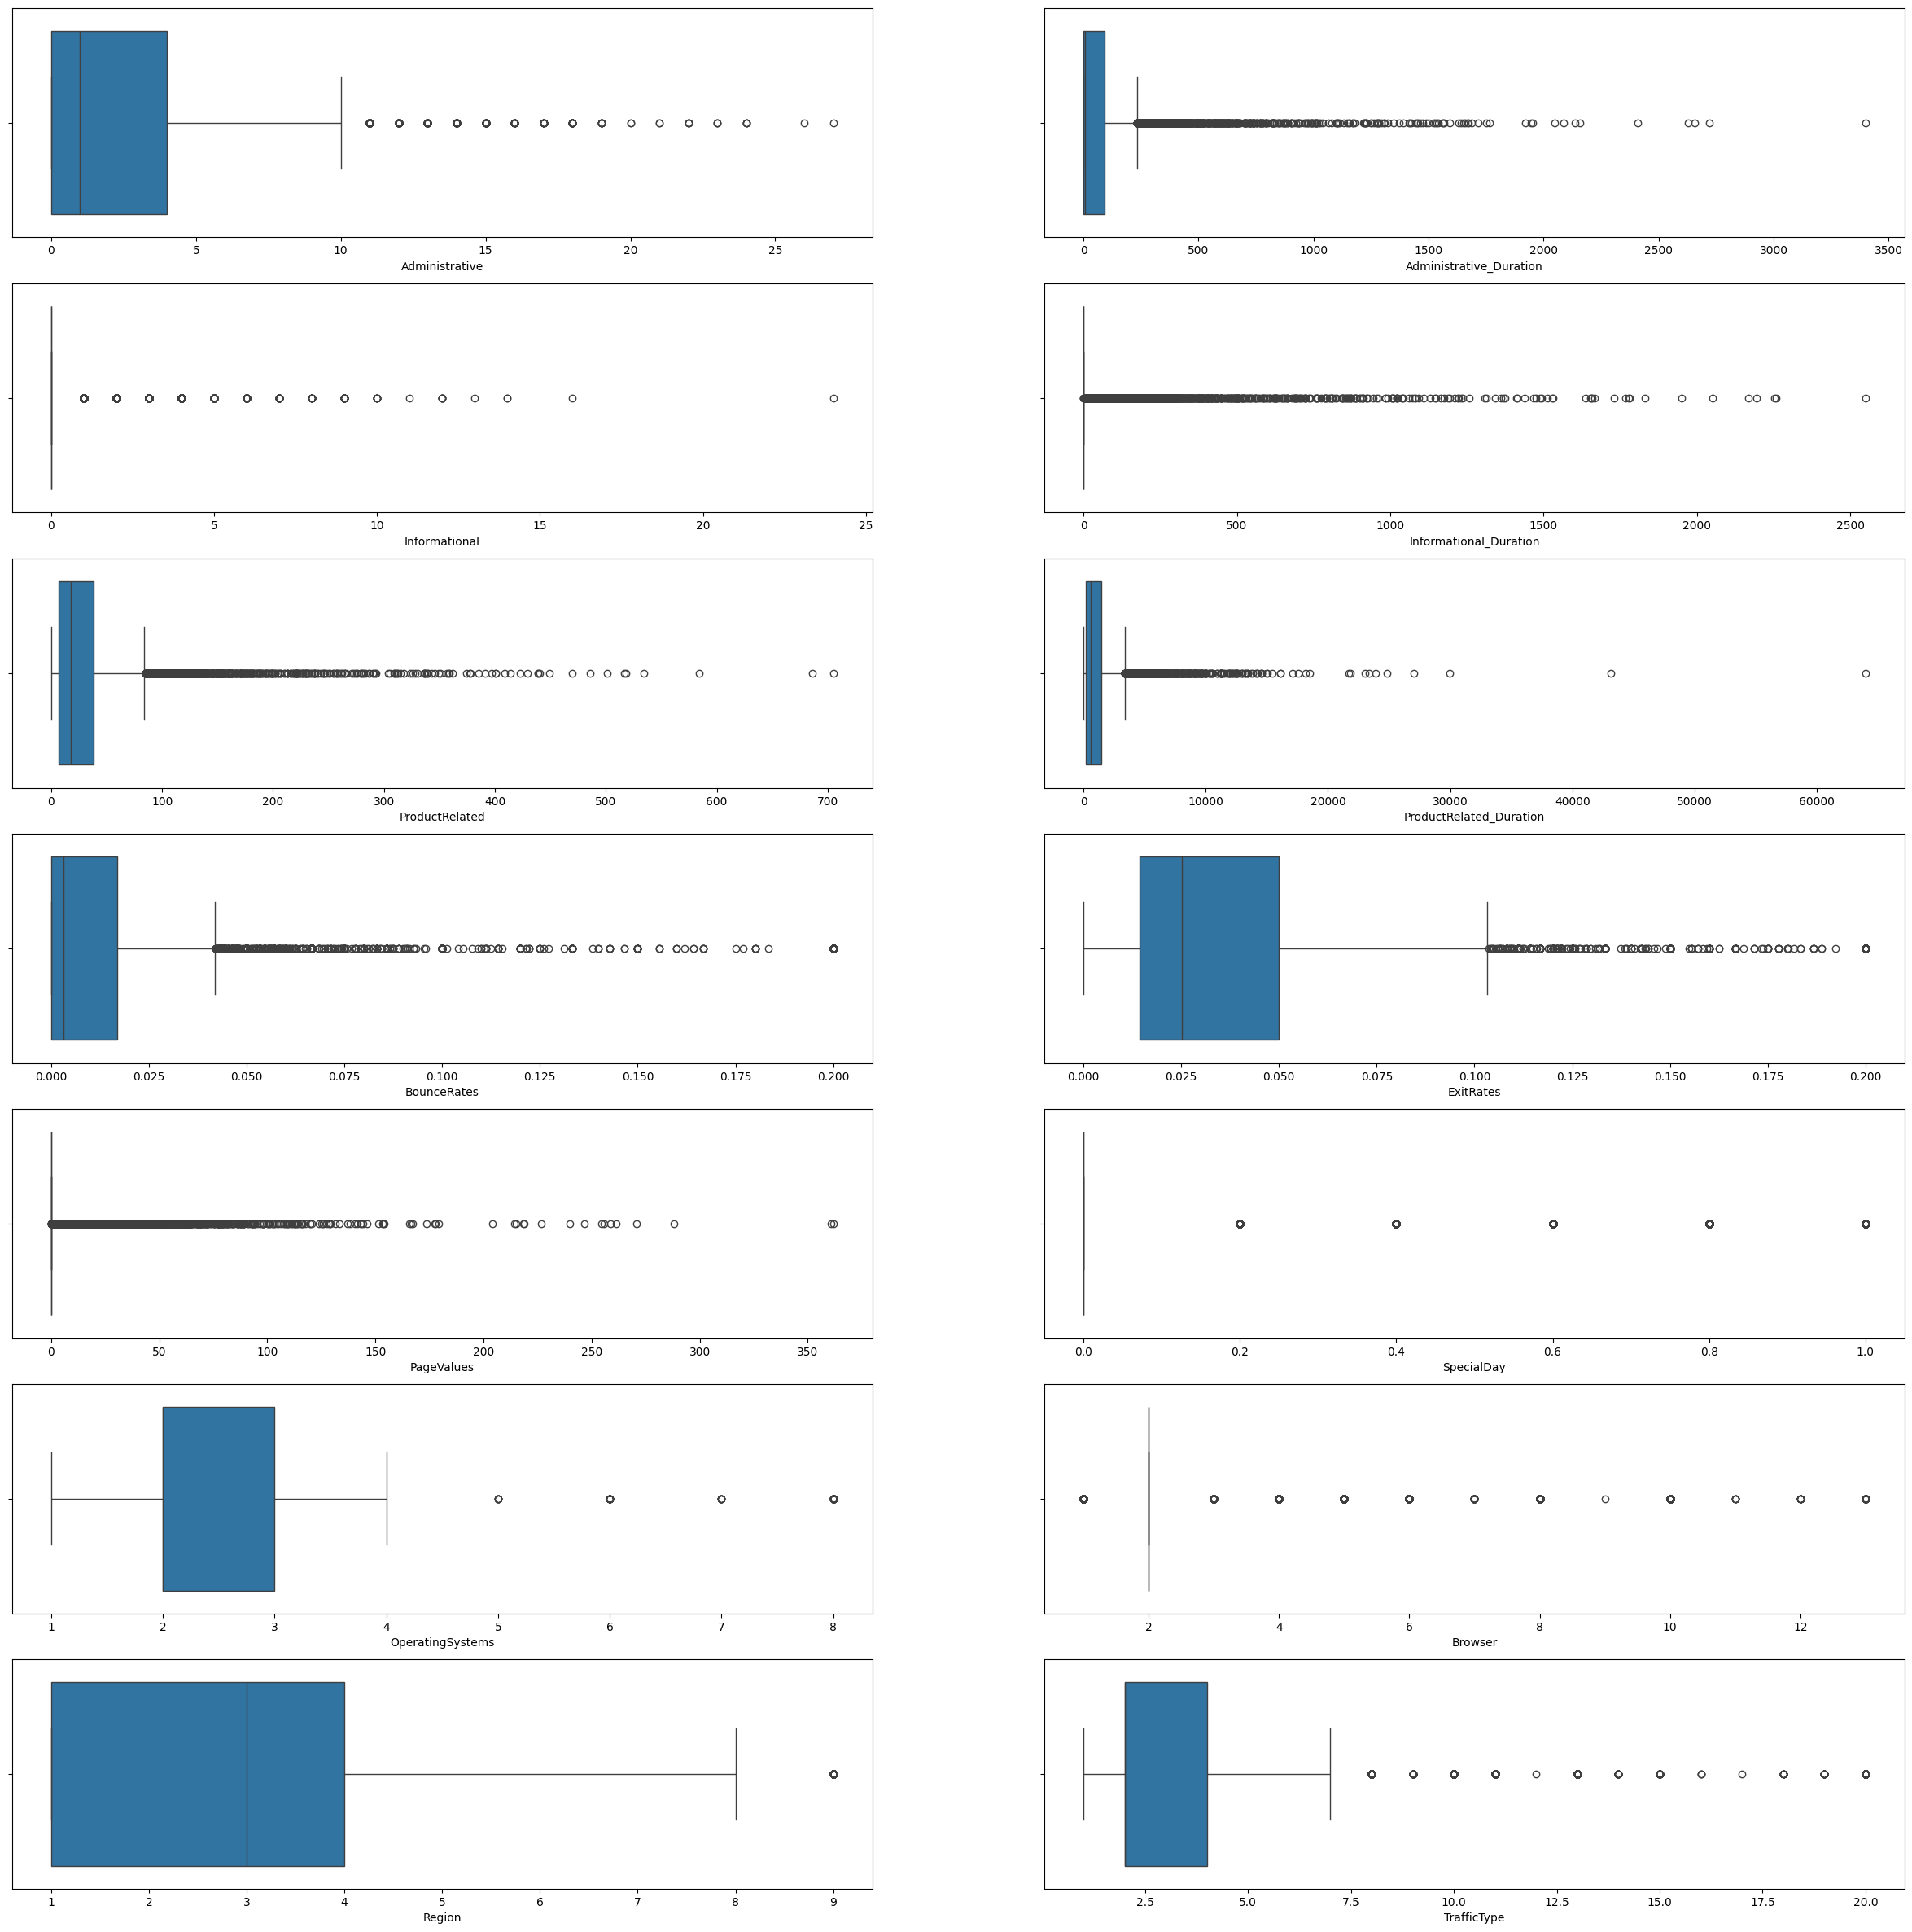

In [ ]:
# inspect outliers
fig, axes = plt.subplots(7, 2, figsize=(30, 30))

sns.boxplot(x=df["Administrative"], ax=axes[0, 0])
sns.boxplot(x=df["Administrative_Duration"], ax=axes[0, 1])
sns.boxplot(x=df["Informational"], ax=axes[1, 0])
sns.boxplot(x=df["Informational_Duration"], ax=axes[1, 1])
sns.boxplot(x=df["ProductRelated"], ax=axes[2, 0])
sns.boxplot(x=df["ProductRelated_Duration"], ax=axes[2, 1])
sns.boxplot(x=df["BounceRates"], ax=axes[3, 0])
sns.boxplot(x=df["ExitRates"], ax=axes[3, 1])
sns.boxplot(x=df["PageValues"], ax=axes[4, 0])
sns.boxplot(x=df["SpecialDay"], ax=axes[4, 1])
sns.boxplot(x=df["OperatingSystems"], ax=axes[5, 0])
sns.boxplot(x=df["Browser"], ax=axes[5, 1])
sns.boxplot(x=df["Region"], ax=axes[6, 0])
sns.boxplot(x=df["TrafficType"], ax=axes[6, 1])

<Axes: xlabel='TrafficType', ylabel='Count'>

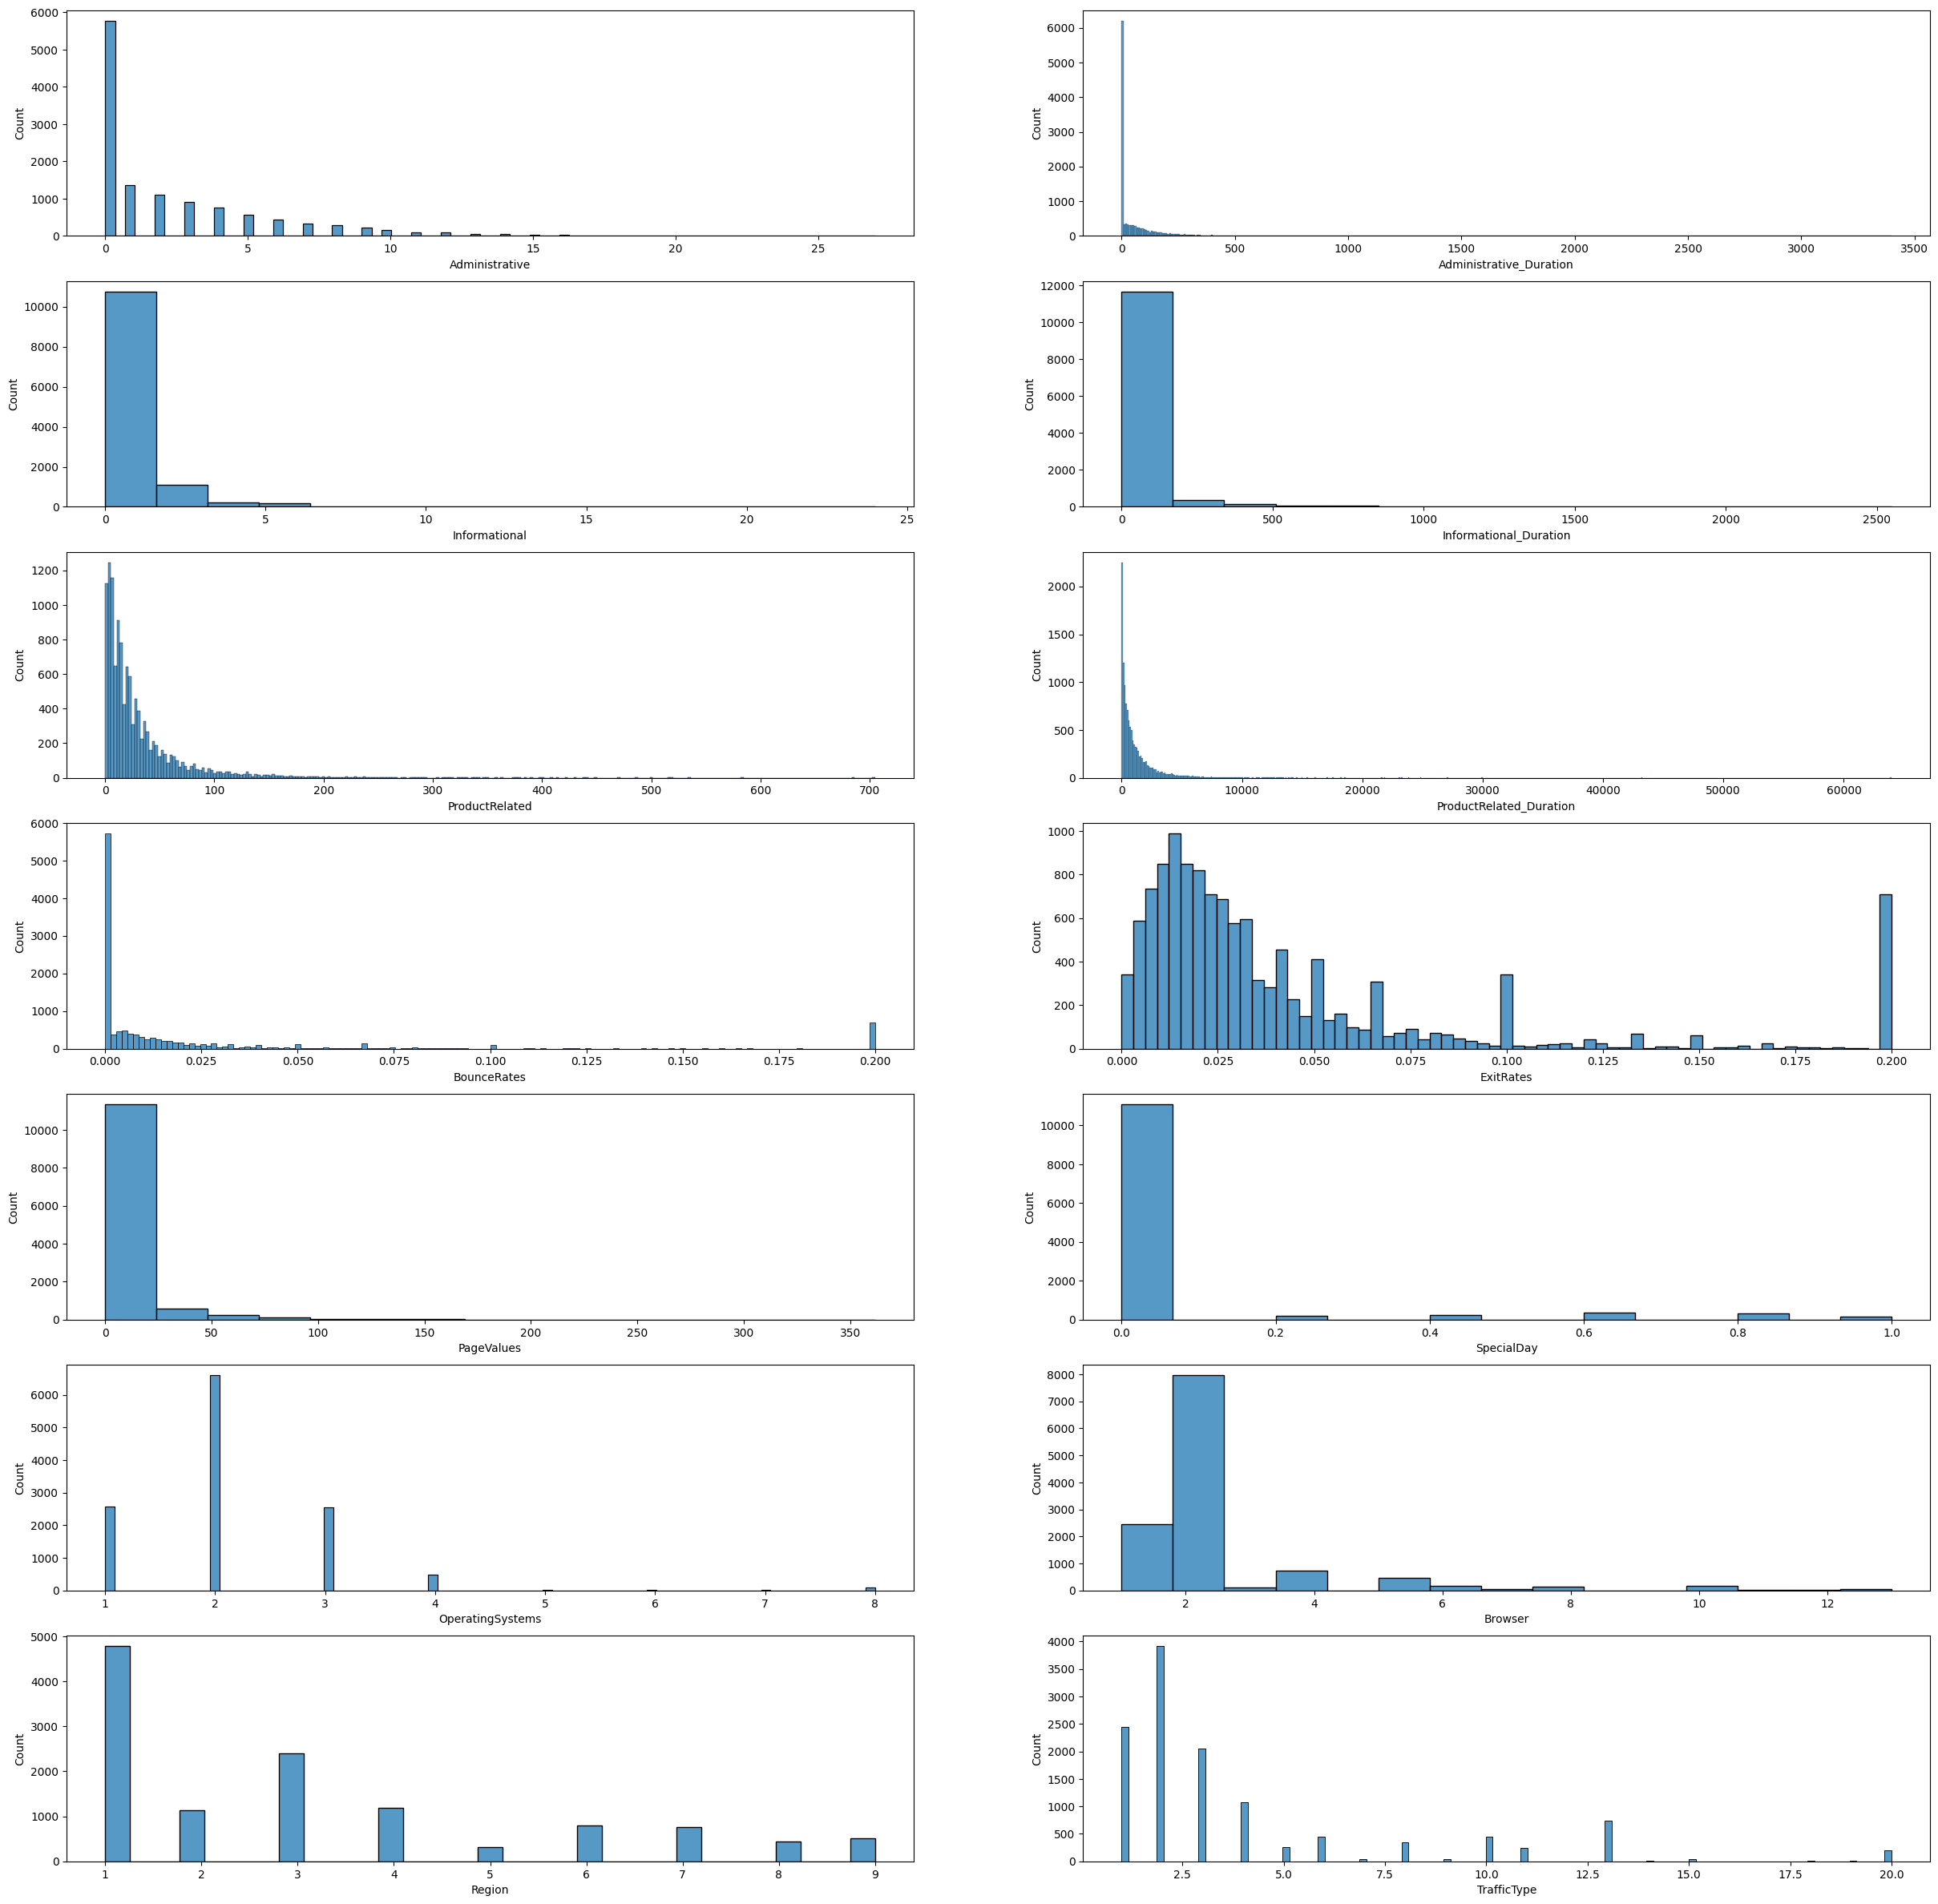

In [ ]:
# inspect skewness
fig, axes = plt.subplots(7, 2, figsize=(30, 30))

sns.histplot(df["Administrative"], ax=axes[0, 0])
sns.histplot(df["Administrative_Duration"], ax=axes[0, 1])
sns.histplot(df["Informational"], ax=axes[1, 0])
sns.histplot(df["Informational_Duration"], ax=axes[1, 1])
sns.histplot(df["ProductRelated"], ax=axes[2, 0])
sns.histplot(df["ProductRelated_Duration"], ax=axes[2, 1])
sns.histplot(df["BounceRates"], ax=axes[3, 0])
sns.histplot(df["ExitRates"], ax=axes[3, 1])
sns.histplot(df["PageValues"], ax=axes[4, 0])
sns.histplot(df["SpecialDay"], ax=axes[4, 1])
sns.histplot(df["OperatingSystems"], ax=axes[5, 0])
sns.histplot(df["Browser"], ax=axes[5, 1])
sns.histplot(df["Region"], ax=axes[6, 0])
sns.histplot(df["TrafficType"], ax=axes[6, 1])

#### Inspect Categorical Columns

In [ ]:
def value_counts_plot(dataframe, columns):
    """
    This is Python function to get value counts from columns, and then
    visualize the data by Seaborn barplot library
    """
    data = dataframe[columns].value_counts()
    axis = sns.barplot(x=data.index, y=data.values)

    axis.set_title('Value Counts of column: ' + columns)  # set title
    axis.bar_label(axis.containers[0])
    axis.set_xlabel('Value')  # set x label
    axis.set_ylabel('Count')  # set y label

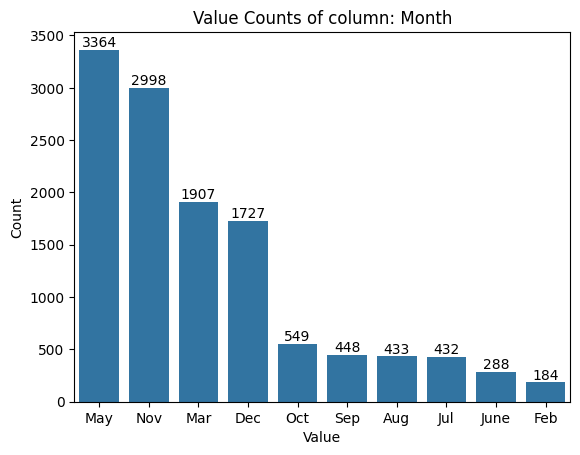

In [ ]:
value_counts_plot(df, "Month")

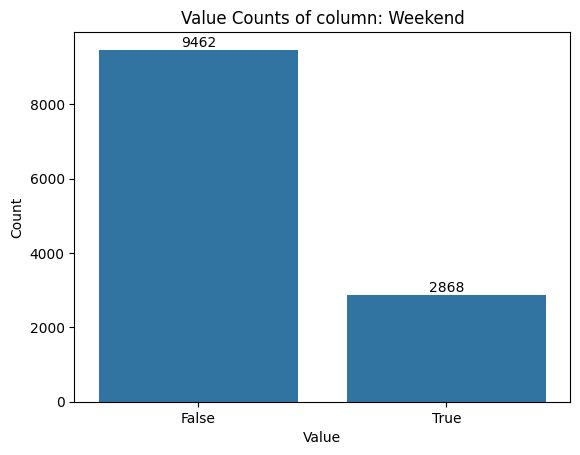

In [ ]:
value_counts_plot(df, "Weekend")

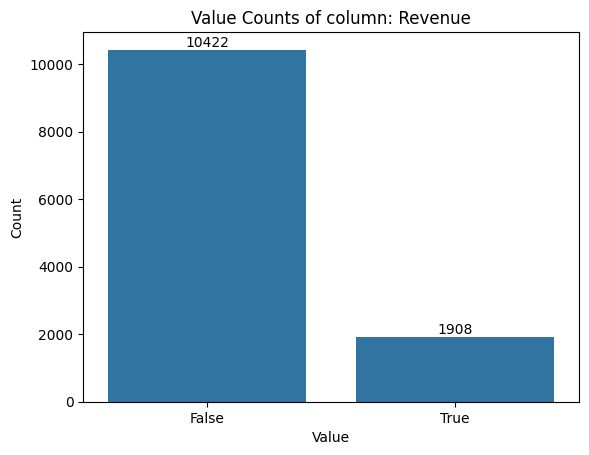

In [ ]:
value_counts_plot(df, "Revenue")

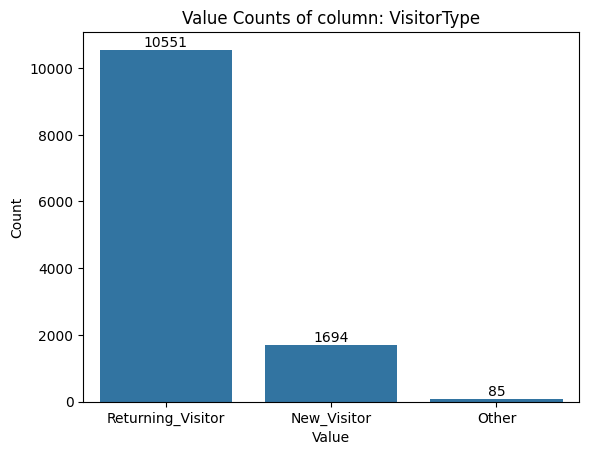

In [ ]:
value_counts_plot(df, "VisitorType")

#### Inspect relationship between Columns

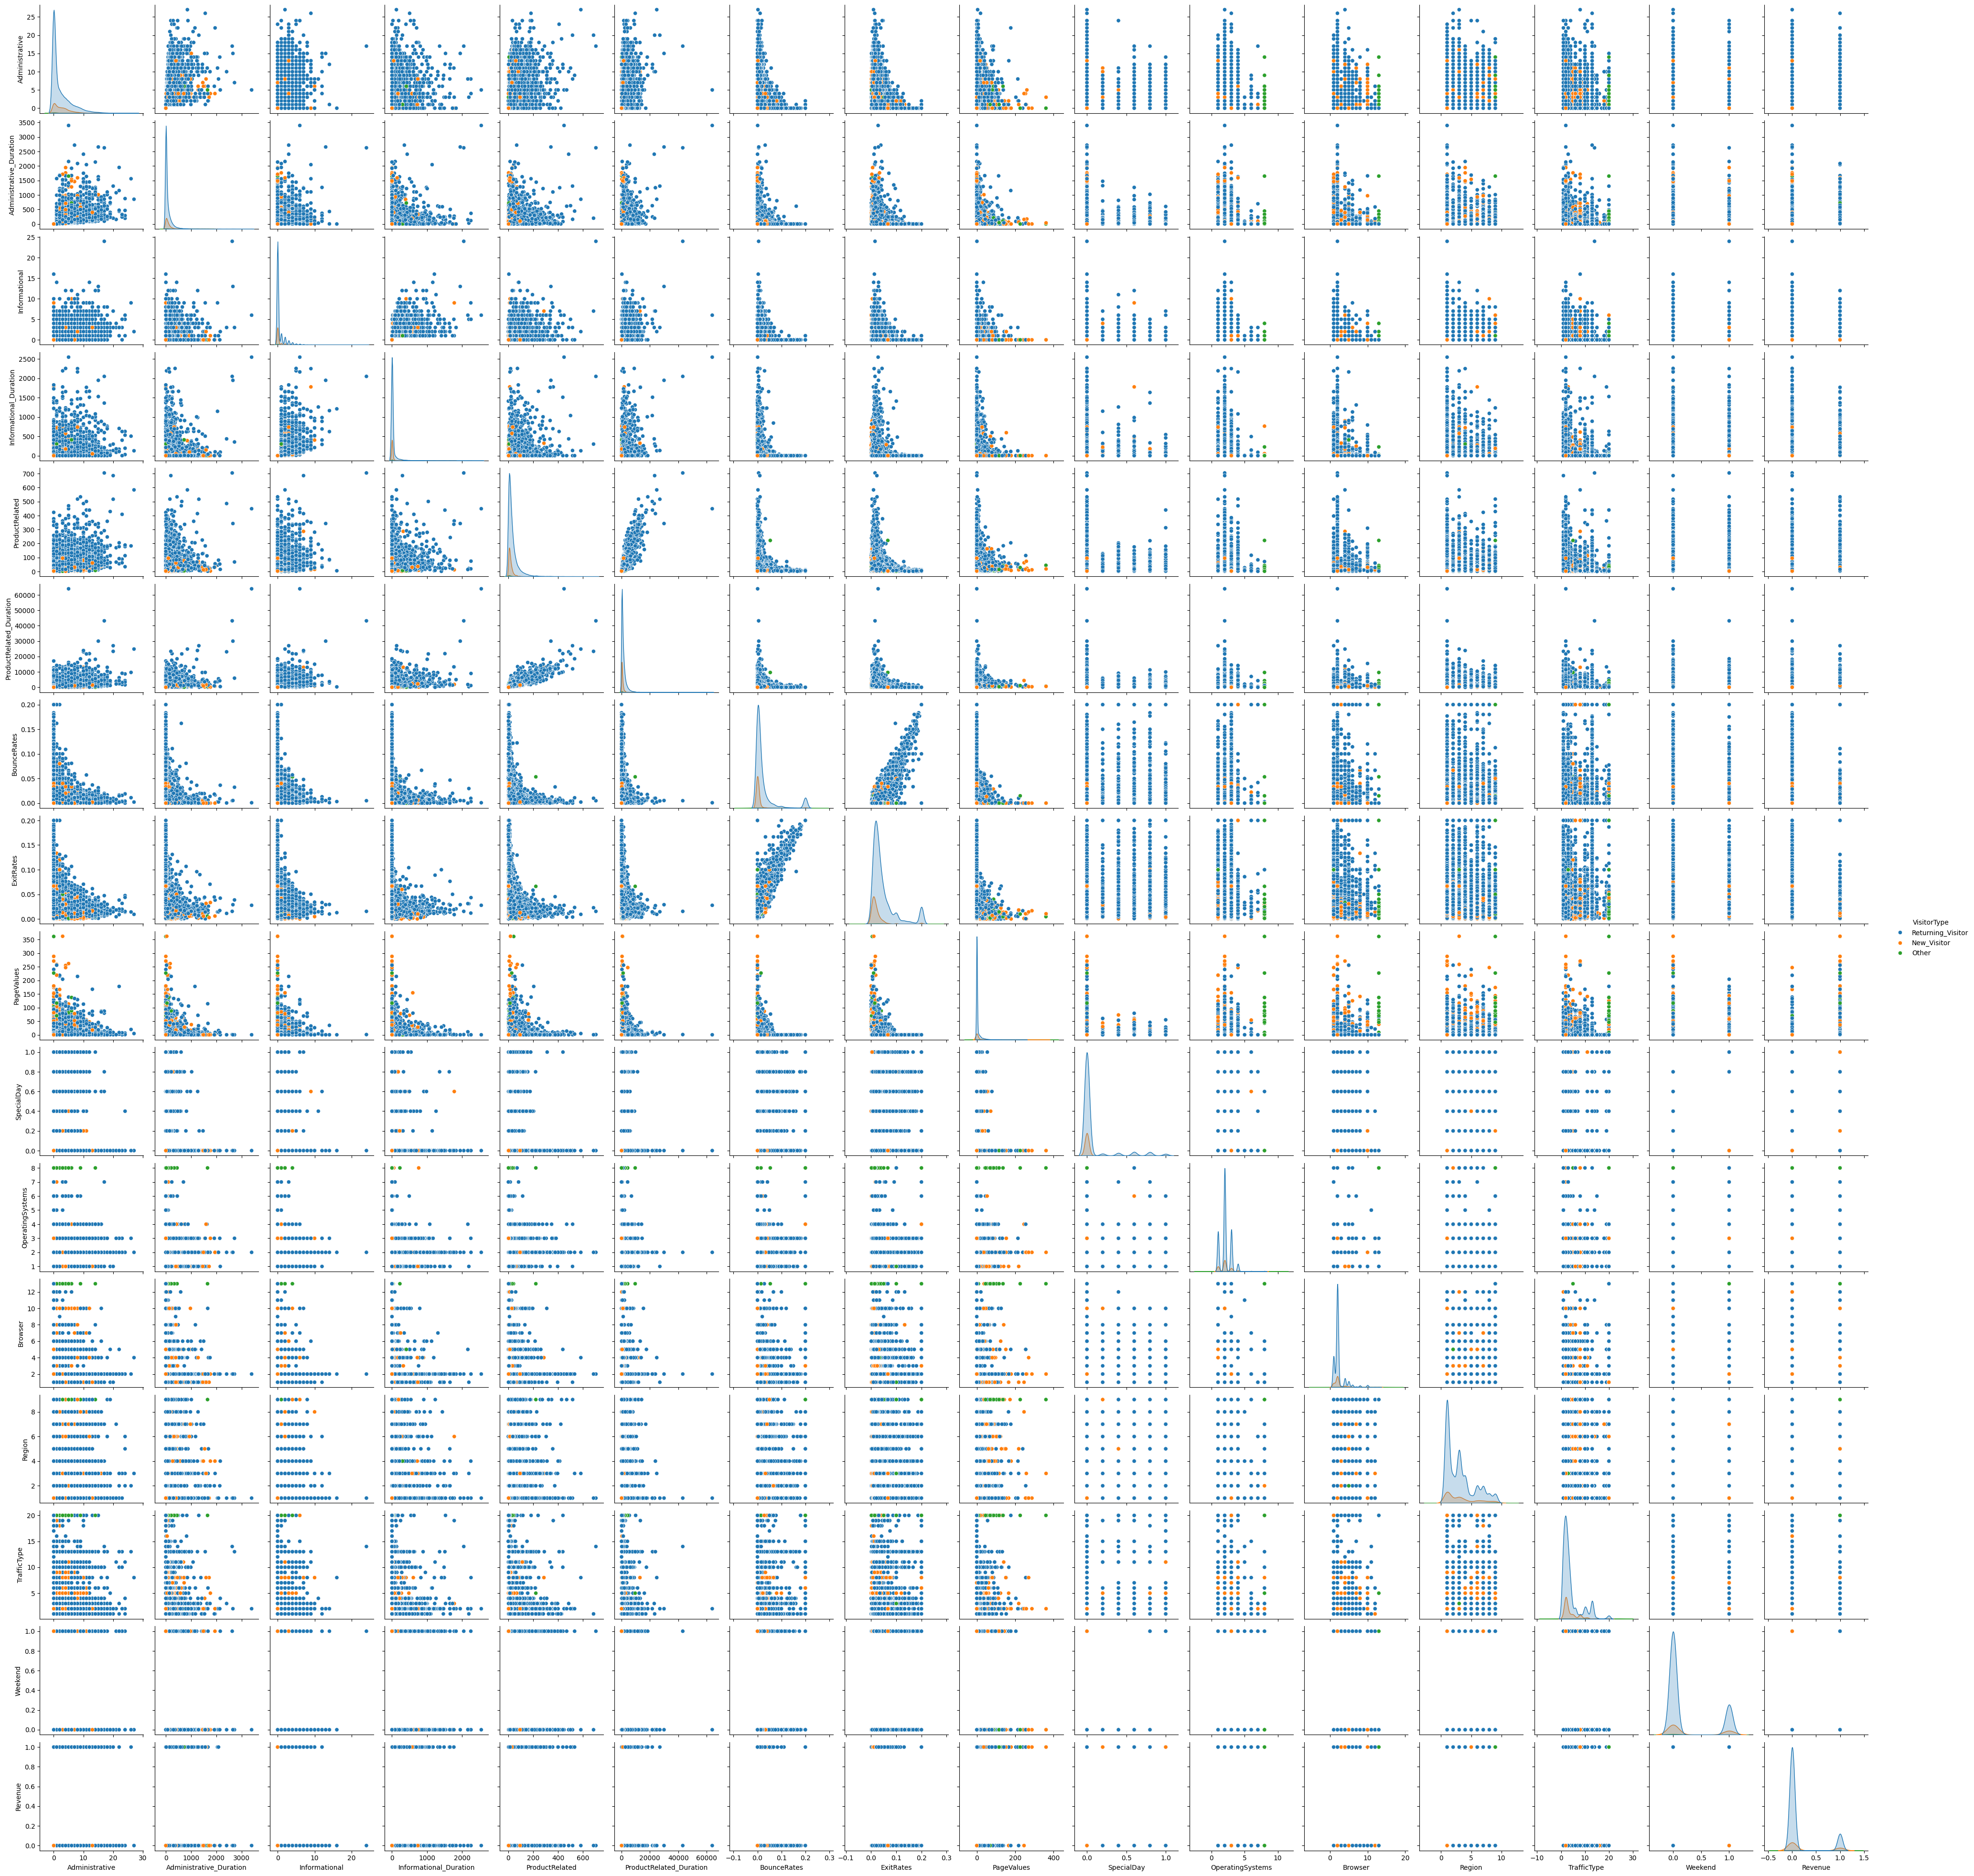

In [ ]:
sns.pairplot(df, hue="VisitorType")

#### Inspect duplicates

In [ ]:
def check_duplicates(dataframe):
    duplicates = dataframe.duplicated().sum()
    duplicate_rows = dataframe[dataframe.duplicated()]

    return duplicates, duplicate_rows

In [ ]:
# check duplicates
num_duplicates, duplicates_df = check_duplicates(df)

# Print the results
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 125


In [ ]:
if num_duplicates > 0:
    print(duplicates_df)

       Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0 

## Task 2: Feature Engineering

In [ ]:
# copy the dataset
df_copy = df.copy()

### Handling duplicates

In [ ]:
# drop duplicates
df_copy = df_copy.drop_duplicates()

### Replace values in columns

In [ ]:
# replace categorical values
df_copy["Month"].replace({"May": 5, "Nov": 11, "Mar": 3, "Dec": 12, "Oct": 10, "Sep":9, "Aug": 8, "Jul": 7, "June": 6, "Feb": 2}, inplace=True)

In [ ]:
# replace categorical values
df_copy["Weekend"].replace({True: 1, False: 0}, inplace=True)

In [ ]:
# replace categorical values
df_copy["Revenue"].replace({True: 1, False: 0}, inplace=True)

### Removing outliers

In [ ]:
def filter_iqr_outliers_multi(df, columns):
  '''
  function to use IQR to remove outliers
  '''
  original_rows = len(df)
  deleted_rows = 0
  for col in columns:
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df = df[df[col].between(lower_bound, upper_bound)]
      current_rows = len(df)
      deleted_rows += original_rows - current_rows
      original_rows = current_rows

  print(f"A total of {deleted_rows} rows have been filtered across all assigned columns.")
  return df

In [ ]:
# removing outliers
df_copy_filtered = filter_iqr_outliers_multi(df_copy, ["Administrative", "Region", "OperatingSystems"])

A total of 946 rows have been filtered across all assigned columns.


### One-hot Encoding

In [ ]:
# one-hot encoding column
df_encoded_visitor_type = pd.get_dummies(df_copy_filtered["VisitorType"], prefix='VisitorType_')
one_hot_encoded_column = df_encoded_visitor_type.columns.to_list()

In [ ]:
df_copy_filtered = pd.concat([df_copy_filtered, df_encoded_visitor_type], axis=1)

In [ ]:
df_copy_filtered.drop(["VisitorType"], axis = 1, inplace=True)

### Correlation Analysis

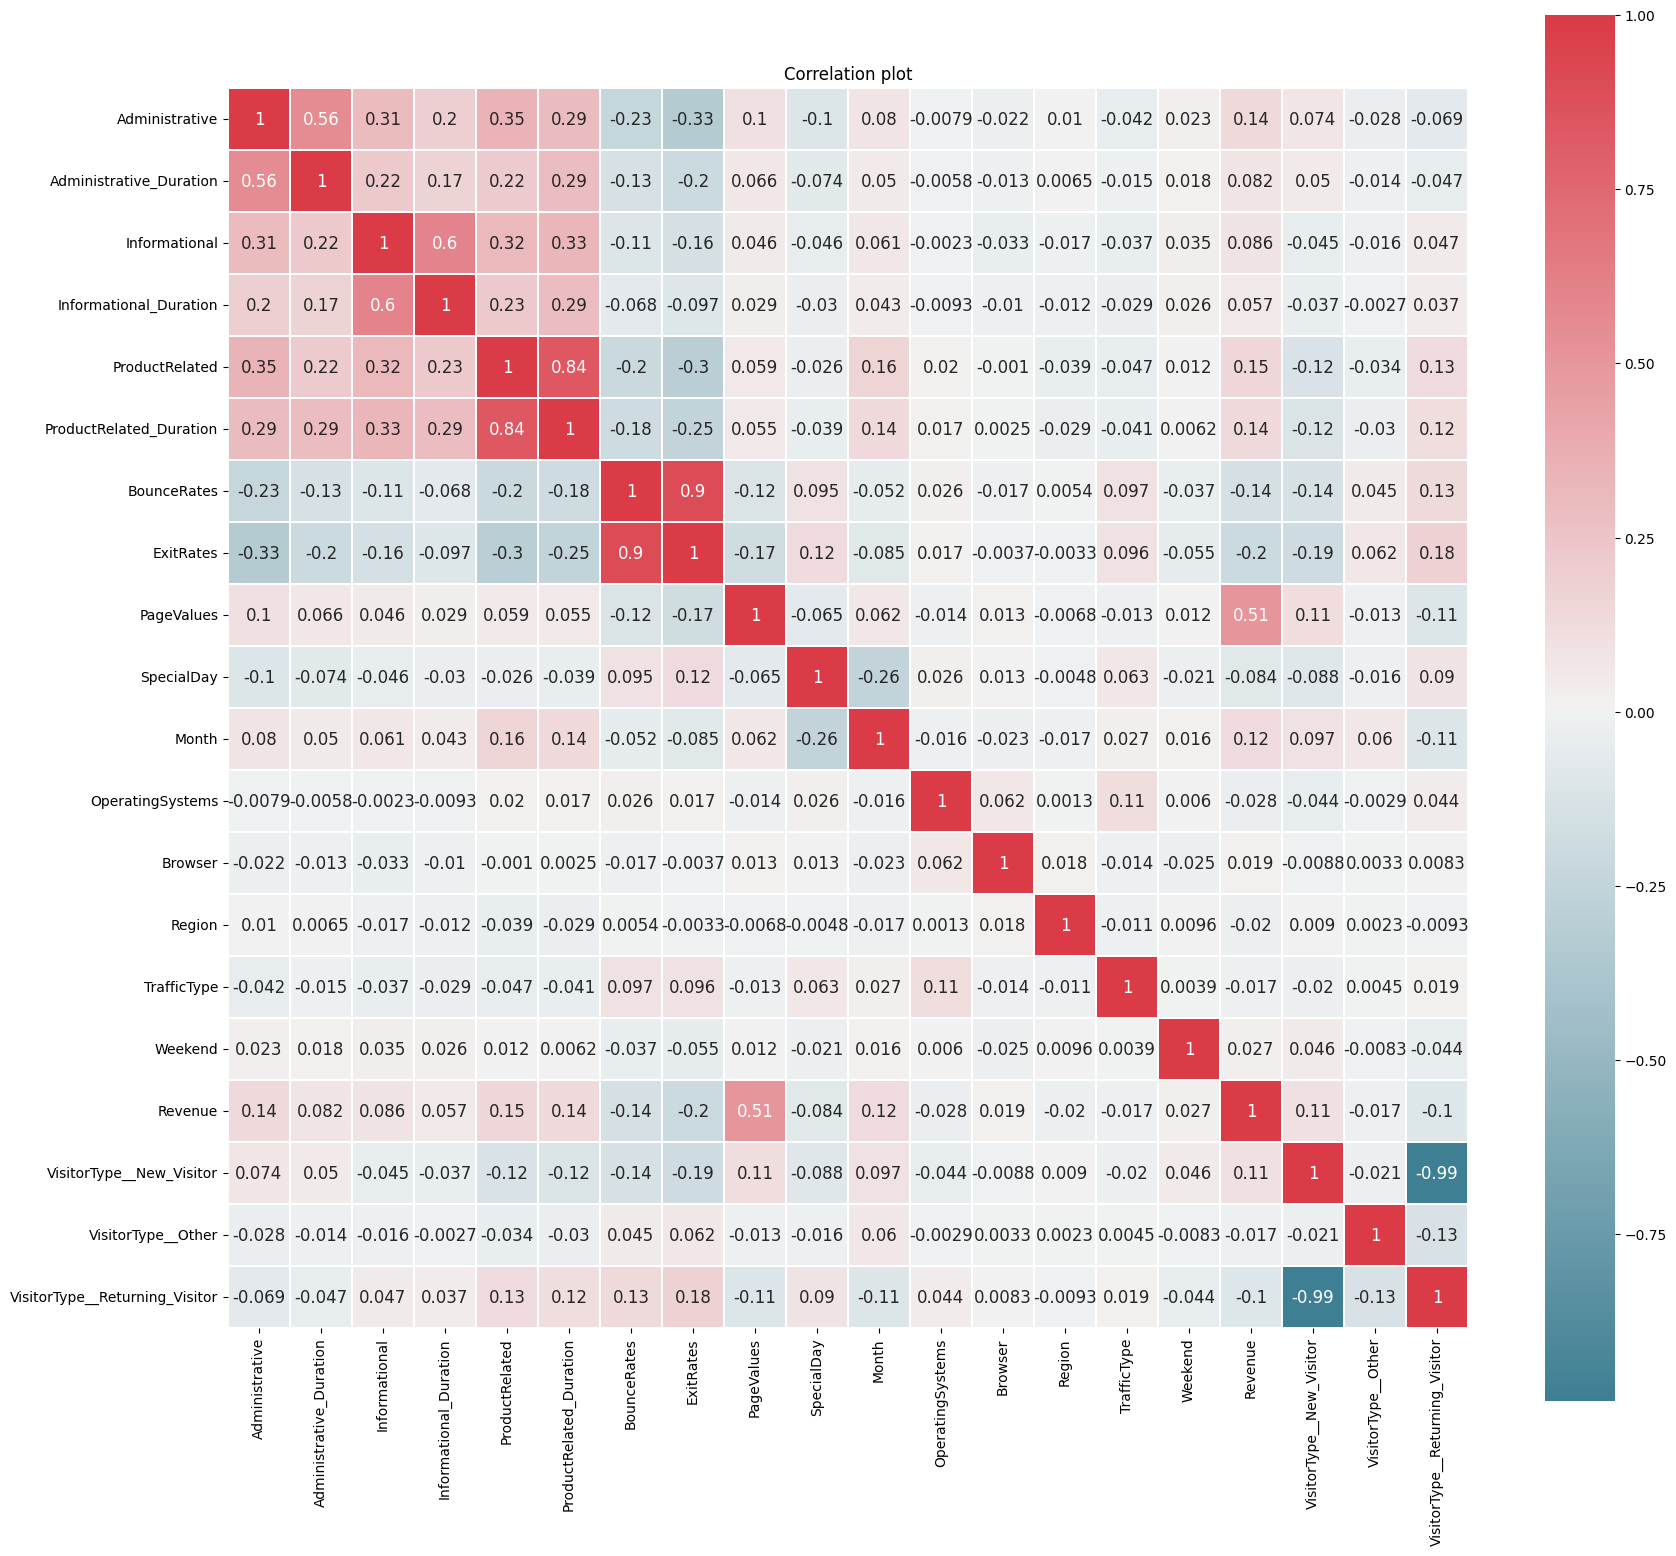

In [ ]:
# plotting heat map
def heatmap_plot(dataframe):
    figure, axis = plt.subplots(figsize=(20, 20))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(
        dataframe.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=axis,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 12}
    )
    plt.title("Correlation plot")
    plt.show()

heatmap_plot(df_copy_filtered)

## Task 3: Data Modelling

### 3.1: Clustering

In [ ]:
df_cluster = df_copy_filtered.copy()

In [ ]:
#Min-max scaling for numeric columns to be used in clustering model
# Select numeric columns
numeric_columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_columns = scaler.fit_transform(df_cluster[numeric_columns])

# Replace the original values in df with the scaled values
df_cluster[numeric_columns] = scaled_columns

#### Clustering model with numeric columns

In [ ]:
x = df_cluster[numeric_columns]

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init= 10)

    # Fit model to samples
    model.fit(x)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

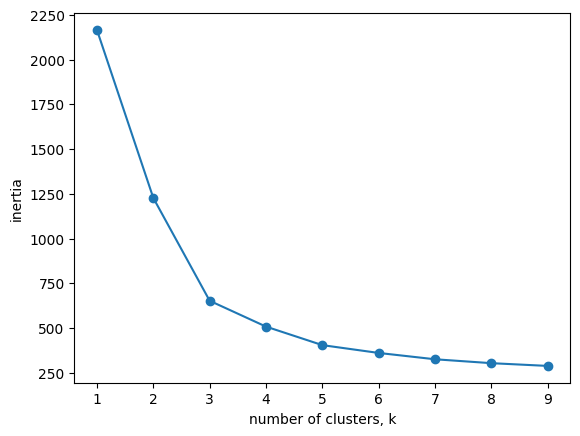

In [ ]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# check model with k=3
model_kmean = KMeans(n_clusters=3, n_init = 100, max_iter=100)
# Fit model to samples
model_kmean.fit(x)
df_cluster['predict_kmean'] = model_kmean.predict(x)

In [ ]:
df_cluster[['Revenue', "predict_kmean"]].sort_values(['predict_kmean'])

Revenue  predict_kmean
12329        0              0
5598         0              0
10047        1              0
5595         0              0
10048        0              0
...        ...            ...
5903         1              2
9911         0              2
5895         0              2
5922         0              2
6023         0              2

[11259 rows x 2 columns]

Text(0.5, 1.0, 'Bar Plot of predict_kmean vs. Count of Revenue Values')

<Figure size 800x600 with 0 Axes>

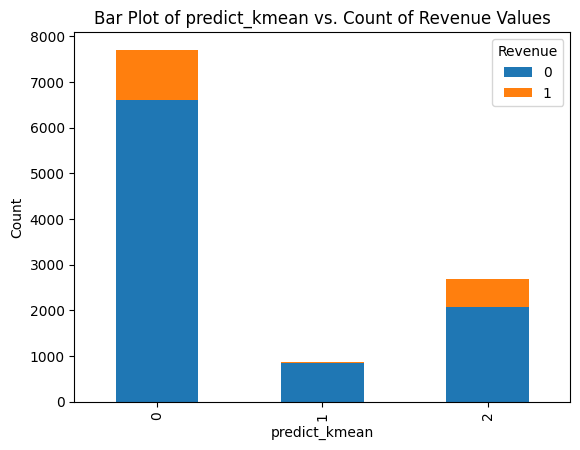

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))
df_cluster.groupby(['predict_kmean', 'Revenue']).size().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('predict_kmean')
plt.ylabel('Count')
plt.title('Bar Plot of predict_kmean vs. Count of Revenue Values')

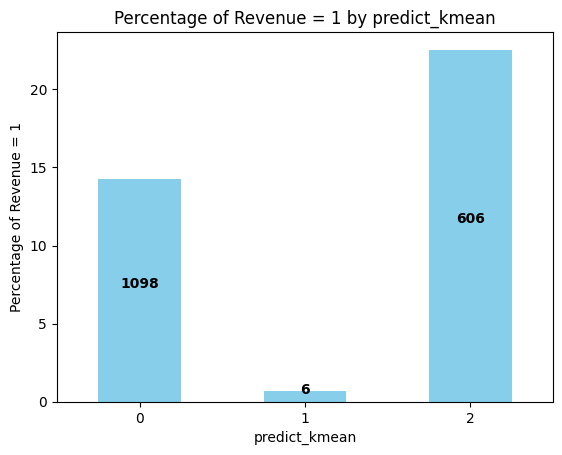

In [ ]:
grouped_data = df_cluster.groupby('predict_kmean')['Revenue']

# Calculate the percentage of Revenue = 1 and count for each group
percentage_and_count = grouped_data.mean() * 100
count = grouped_data.sum()

# Plotting the bar chart with count labels
ax = percentage_and_count.plot(kind='bar', rot=0, color='skyblue')
plt.title('Percentage of Revenue = 1 by predict_kmean')
plt.xlabel('predict_kmean')
plt.ylabel('Percentage of Revenue = 1')

# Display count values on top of each bar
for i, v in enumerate(count):
    ax.text(i, percentage_and_count.iloc[i]/2, f'{v}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

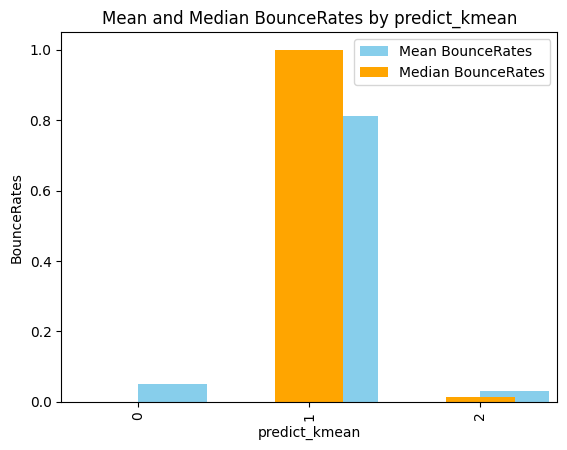

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_kmean')['BounceRates'].mean()
grouped_data_median = df_cluster.groupby('predict_kmean')['BounceRates'].median()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean BounceRates', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median BounceRates', ax=ax, align='edge')

ax.set_title('Mean and Median BounceRates by predict_kmean')
ax.set_xlabel('predict_kmean')
ax.set_ylabel('BounceRates')
ax.legend()

plt.show()

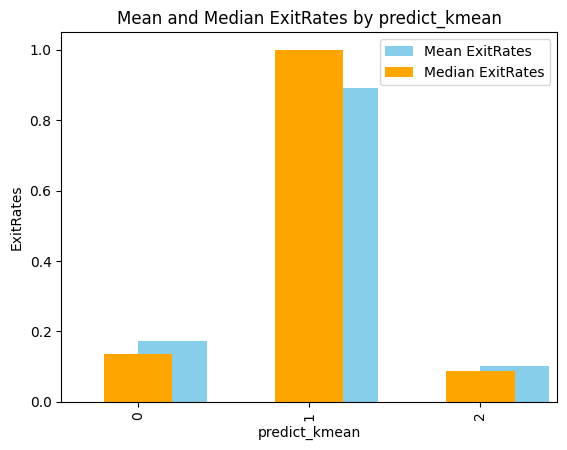

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_kmean')['ExitRates'].mean()
grouped_data_median = df_cluster.groupby('predict_kmean')['ExitRates'].median()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean ExitRates', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median ExitRates', ax=ax, align='edge')

ax.set_title('Mean and Median ExitRates by predict_kmean')
ax.set_xlabel('predict_kmean')
ax.set_ylabel('ExitRates')
ax.legend()

plt.show()

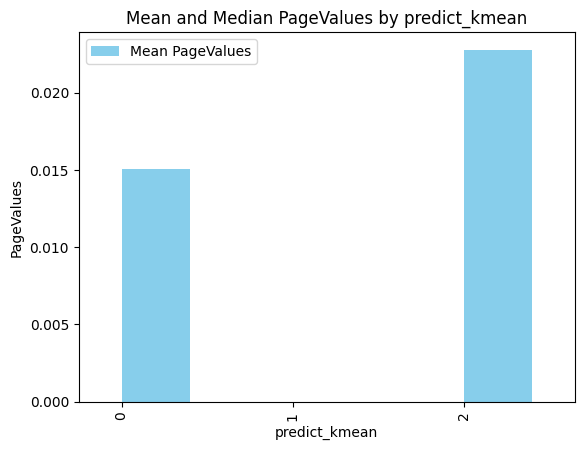

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_kmean')['PageValues'].mean()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean PageValues', ax=ax, align='center')

ax.set_title('Mean and Median PageValues by predict_kmean')
ax.set_xlabel('predict_kmean')
ax.set_ylabel('PageValues')
ax.legend()

plt.show()

#### Applying PCA on K Means model

In [ ]:
df_cluster.head(5)

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   
5             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0        0.001873                 0.000000   
1                     0.0        0.003745                 0.001000   
3                     0.0        0.003745                 0.000042   
4                     0.0        0.018727                 0.009809   
5                     0.0        0.035581                 0.002411   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  OperatingSystems  \
0     1.000000   1.000000         0.0         0.0  ...                 1   
1     0.000000   0.500000         0.0         0.0  ...                 2   
3     0.250000   0.700000         0.0         0.0  ...                 3   
4     0.100000   0.250000         0.0         0.0  ...                 3   
5     0.078947   0.122807         0.0         0.0  ...                 2   

   Browser  Region  TrafficType  Weekend  Revenue  VisitorType__New_Visitor  \
0        1       1            1        0        0                         0   
1        2       1            2        0        0                         0   
3        2       2            4        0        0                         0   
4        3       1            4        1        0                         0   
5        2       1            3        0        0                         0   

   VisitorType__Other  VisitorType__Returning_Visitor  predict_kmean  
0                   0                               1              1  
1                   0                               1              0  
3                   0                               1              0  
4                   0                               1              0  
5                   0                               1              0  

[5 rows x 21 columns]

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)

In [ ]:
reduced_data

array([[ 1.13738674,  0.41005506],
       [ 0.22349935, -0.13244079],
       [ 0.49976052,  0.02534001],
       ...,
       [ 0.42828306,  0.01294577],
       [-0.22163758,  0.09831951],
       [ 0.11712798, -0.18154662]])

In [ ]:
# Add PCA data as new columns to the original DataFrame
df_cluster['PCA_Component_1'] = reduced_data[:, 0]
df_cluster['PCA_Component_2'] = reduced_data[:, 1]

In [ ]:
x_2 = df_cluster[['PCA_Component_1','PCA_Component_2' ]]
inertias_2 = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init= 10)

    # Fit model to samples
    model.fit(x_2)

    # Append the inertia to the list of inertias
    inertias_2.append(model.inertia_)

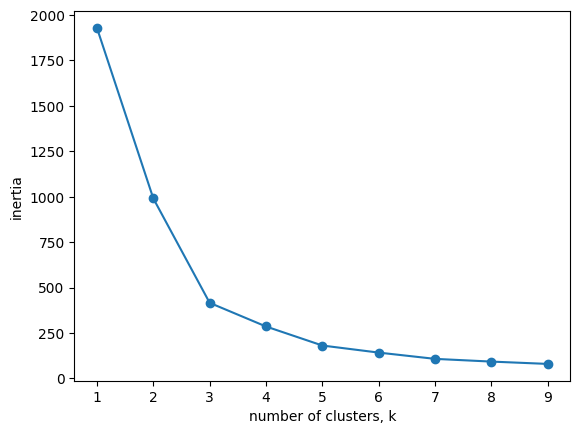

In [ ]:
plt.plot(ks, inertias_2, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# check model with k=3
model_kmean_pca = KMeans(n_clusters=3, n_init = 10, max_iter=100)
# Fit model to samples
model_kmean_pca.fit(x_2)
df_cluster['predict_kmean_pca'] = model_kmean_pca.predict(x_2)

Text(0.5, 1.0, 'Bar Plot of predict_kmean_pca vs. Count of Revenue Values')

<Figure size 800x600 with 0 Axes>

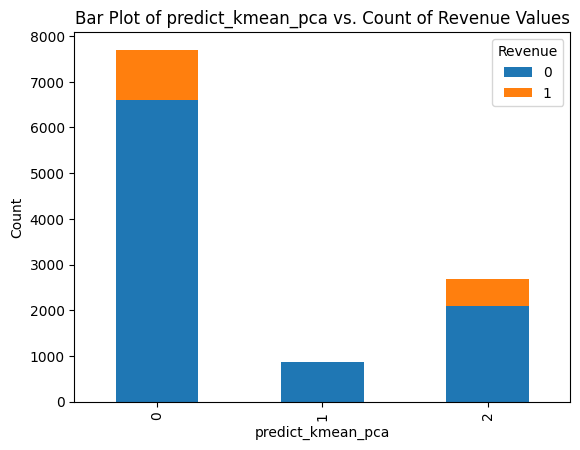

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))
df_cluster.groupby(['predict_kmean_pca', 'Revenue']).size().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('predict_kmean_pca')
plt.ylabel('Count')
plt.title('Bar Plot of predict_kmean_pca vs. Count of Revenue Values')

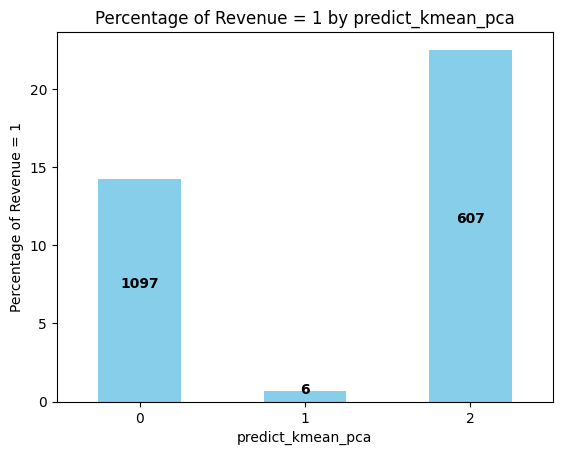

In [ ]:
grouped_data = df_cluster.groupby('predict_kmean_pca')['Revenue']

# Calculate the percentage of Revenue = 1 and count for each group
percentage_and_count = grouped_data.mean() * 100
count = grouped_data.sum()

# Plotting the bar chart with count labels
ax = percentage_and_count.plot(kind='bar', rot=0, color='skyblue')
plt.title('Percentage of Revenue = 1 by predict_kmean_pca')
plt.xlabel('predict_kmean_pca')
plt.ylabel('Percentage of Revenue = 1')

# Display count values on top of each bar
for i, v in enumerate(count):
    ax.text(i, percentage_and_count.iloc[i]/2, f'{v}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

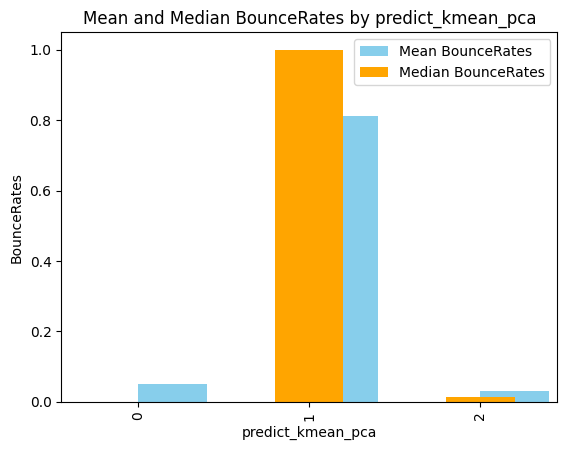

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_kmean_pca')['BounceRates'].mean()
grouped_data_median = df_cluster.groupby('predict_kmean_pca')['BounceRates'].median()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean BounceRates', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median BounceRates', ax=ax, align='edge')

ax.set_title('Mean and Median BounceRates by predict_kmean_pca')
ax.set_xlabel('predict_kmean_pca')
ax.set_ylabel('BounceRates')
ax.legend()

plt.show()

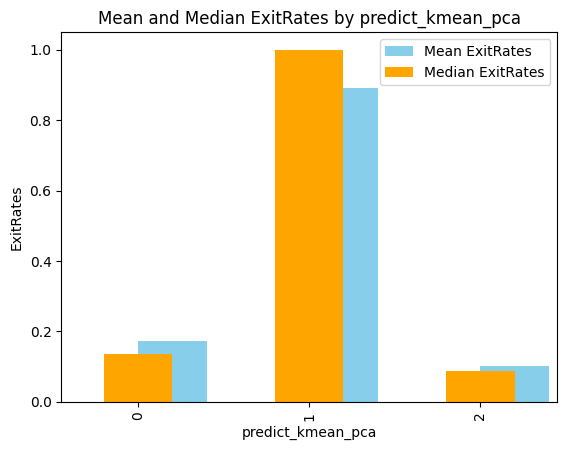

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_kmean_pca')['ExitRates'].mean()
grouped_data_median = df_cluster.groupby('predict_kmean_pca')['ExitRates'].median()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean ExitRates', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median ExitRates', ax=ax, align='edge')

ax.set_title('Mean and Median ExitRates by predict_kmean_pca')
ax.set_xlabel('predict_kmean_pca')
ax.set_ylabel('ExitRates')
ax.legend()

plt.show()

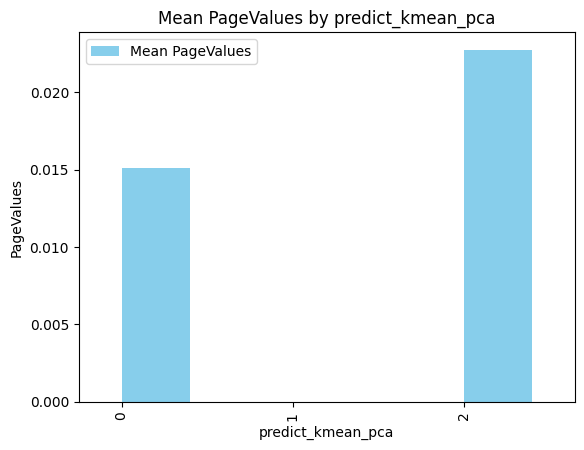

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_kmean_pca')['PageValues'].mean()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean PageValues', ax=ax, align='center')

ax.set_title('Mean PageValues by predict_kmean_pca')
ax.set_xlabel('predict_kmean_pca')
ax.set_ylabel('PageValues')
ax.legend()

plt.show()

#### DBSCAN clustering model

In [ ]:
Y = df_cluster.drop(['predict_kmean', 'PCA_Component_1', 'PCA_Component_2', 'predict_kmean_pca', 'Revenue'], axis=1)

In [ ]:
model_dbscan = DBSCAN(eps=1.5, min_samples=15).fit(Y)
df_cluster['predict_dbscan'] = model_dbscan.labels_

In [ ]:
pd.set_option('display.max_rows', 100)
df_cluster[['Revenue', "predict_dbscan"]].sort_values(['predict_dbscan'])

Revenue  predict_dbscan
7011         1              -1
3834         0              -1
10305        0              -1
743          0              -1
3826         0              -1
...        ...             ...
12039        0              10
9877         0              10
8338         1              10
9895         0              10
11325        0              10

[11259 rows x 2 columns]

Text(0.5, 1.0, 'Bar Plot of predict_dbscan vs. Count of Revenue Values')

<Figure size 800x600 with 0 Axes>

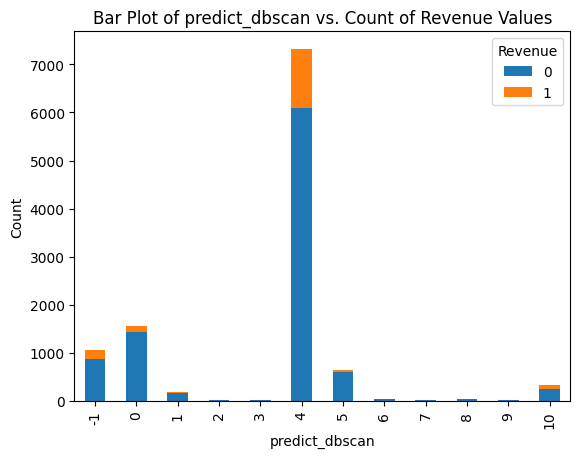

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))
df_cluster.groupby(['predict_dbscan', 'Revenue']).size().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('predict_dbscan')
plt.ylabel('Count')
plt.title('Bar Plot of predict_dbscan vs. Count of Revenue Values')

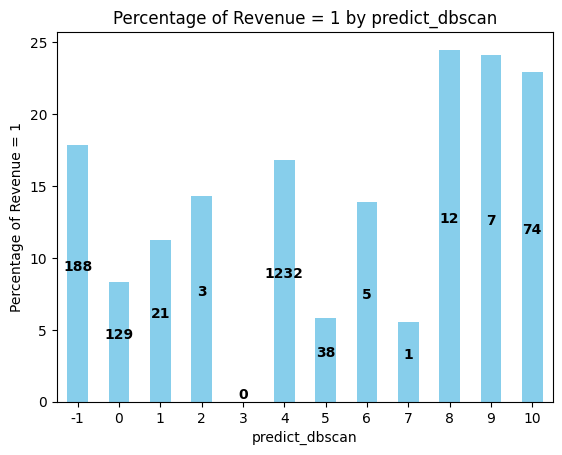

In [ ]:
grouped_data = df_cluster.groupby('predict_dbscan')['Revenue']

# Calculate the percentage of Revenue = 1 and count for each group
percentage_and_count = grouped_data.mean() * 100
count = grouped_data.sum()

# Plotting the bar chart with count labels
ax = percentage_and_count.plot(kind='bar', rot=0, color='skyblue')
plt.title('Percentage of Revenue = 1 by predict_dbscan')
plt.xlabel('predict_dbscan')
plt.ylabel('Percentage of Revenue = 1')

# Display count values on top of each bar
for i, v in enumerate(count):
    ax.text(i, percentage_and_count.iloc[i]/2, f'{v}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

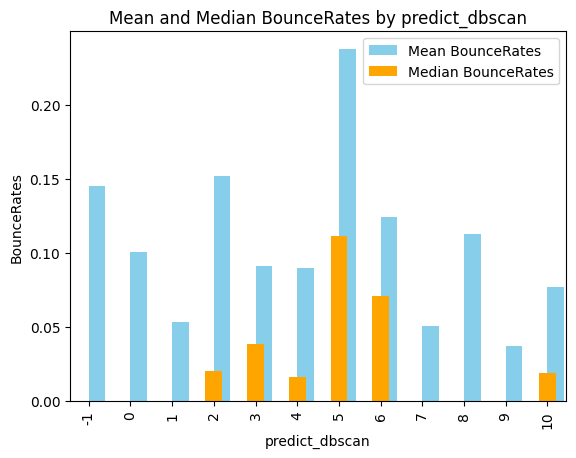

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_dbscan')['BounceRates'].mean()
grouped_data_median = df_cluster.groupby('predict_dbscan')['BounceRates'].median()


# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean BounceRates', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median BounceRates', ax=ax, align='edge')

ax.set_title('Mean and Median BounceRates by predict_dbscan')
ax.set_xlabel('predict_dbscan')
ax.set_ylabel('BounceRates')
ax.legend()

plt.show()

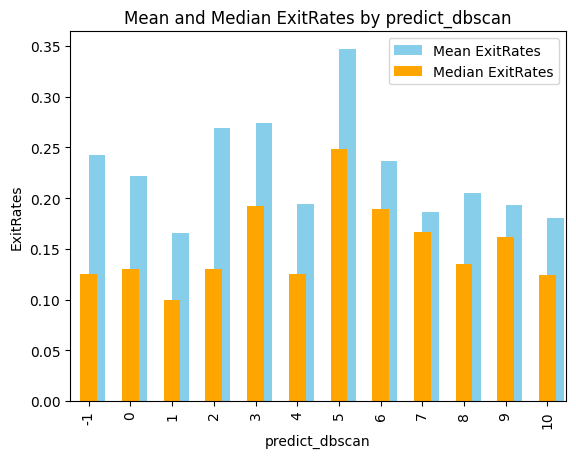

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_dbscan')['ExitRates'].mean()
grouped_data_median = df_cluster.groupby('predict_dbscan')['ExitRates'].median()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean ExitRates', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median ExitRates', ax=ax, align='edge')

ax.set_title('Mean and Median ExitRates by predict_dbscan')
ax.set_xlabel('predict_dbscan')
ax.set_ylabel('ExitRates')
ax.legend()

plt.show()

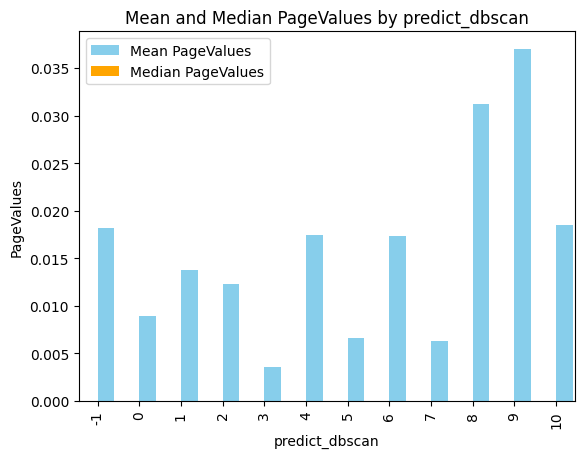

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_dbscan')['PageValues'].mean()
grouped_data_median = df_cluster.groupby('predict_dbscan')['PageValues'].median()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean PageValues', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median PageValues', ax=ax, align='edge')

ax.set_title('Mean and Median PageValues by predict_dbscan')
ax.set_xlabel('predict_dbscan')
ax.set_ylabel('PageValues')
ax.legend()

plt.show()

### Applying PCA on DBSCAN model

In [ ]:
pca = PCA(n_components=2)
reduced_db_data = pca.fit_transform(Y)

In [ ]:
# Add the reduced data as new columns to the original DataFrame
df_cluster['PCA_Component_DB_1'] = reduced_db_data[:, 0]
df_cluster['PCA_Component_DB_2'] = reduced_db_data[:, 1]

In [ ]:
Y_2 = df_cluster[['PCA_Component_DB_1','PCA_Component_DB_2' ]]

In [ ]:
model_dbscan_pca = DBSCAN(eps=1.5, min_samples=15).fit(Y_2)
df_cluster['predict_dbscan_pca'] = model_dbscan_pca.labels_

In [ ]:
pd.set_option('display.max_rows', 100)
df_cluster[['Revenue', "predict_dbscan_pca"]].sort_values(['predict_dbscan_pca'])

Revenue  predict_dbscan_pca
6867         0                  -1
9090         0                  -1
11939        0                  -1
8938         0                  -1
6239         1                  -1
...        ...                 ...
11992        0                   6
10609        0                   6
10610        0                   6
5589         0                   6
9026         0                   6

[11259 rows x 2 columns]

Text(0.5, 1.0, 'Bar Plot of predict_dbscan_pca vs. Count of Revenue Values')

<Figure size 800x600 with 0 Axes>

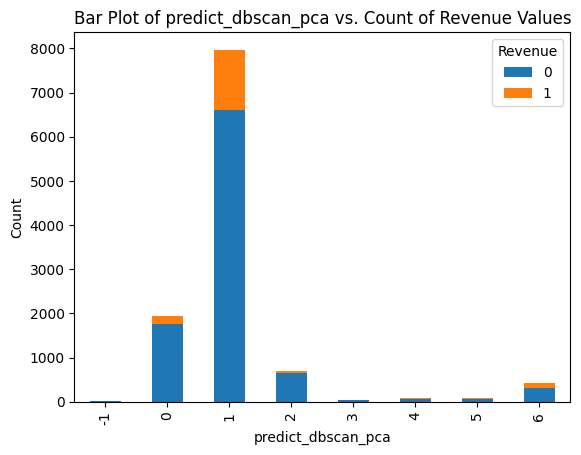

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 6))
df_cluster.groupby(['predict_dbscan_pca', 'Revenue']).size().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('predict_dbscan_pca')
plt.ylabel('Count')
plt.title('Bar Plot of predict_dbscan_pca vs. Count of Revenue Values')

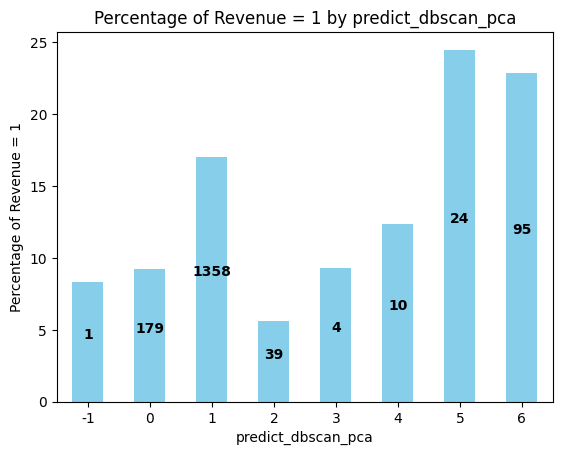

In [ ]:
grouped_data = df_cluster.groupby('predict_dbscan_pca')['Revenue']

# Calculate the percentage of Revenue = 1 and count for each group
percentage_and_count = grouped_data.mean() * 100
count = grouped_data.sum()

# Plotting the bar chart with count labels
ax = percentage_and_count.plot(kind='bar', rot=0, color='skyblue')
plt.title('Percentage of Revenue = 1 by predict_dbscan_pca')
plt.xlabel('predict_dbscan_pca')
plt.ylabel('Percentage of Revenue = 1')

# Display count values on top of each bar
for i, v in enumerate(count):
    ax.text(i, percentage_and_count.iloc[i]/2, f'{v}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

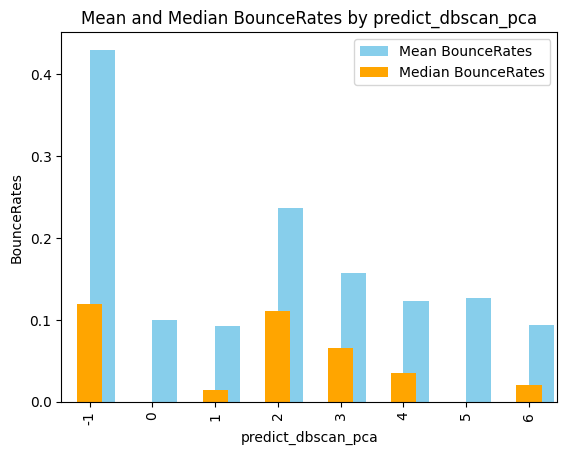

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_dbscan_pca')['BounceRates'].mean()
grouped_data_median = df_cluster.groupby('predict_dbscan_pca')['BounceRates'].median()


# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean BounceRates', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median BounceRates', ax=ax, align='edge')

ax.set_title('Mean and Median BounceRates by predict_dbscan_pca')
ax.set_xlabel('predict_dbscan_pca')
ax.set_ylabel('BounceRates')
ax.legend()


plt.show()

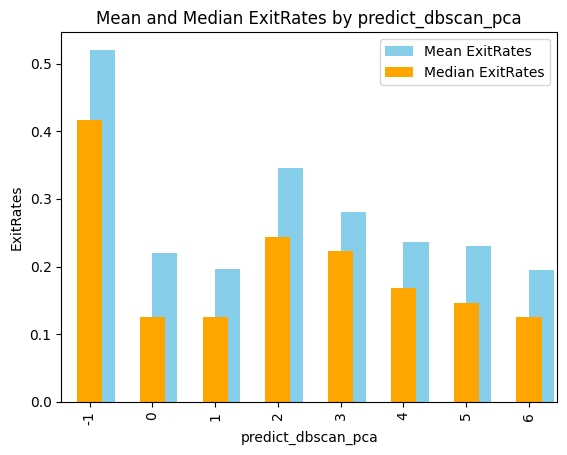

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_dbscan_pca')['ExitRates'].mean()
grouped_data_median = df_cluster.groupby('predict_dbscan_pca')['ExitRates'].median()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean ExitRates', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median ExitRates', ax=ax, align='edge')

ax.set_title('Mean and Median ExitRates by predict_dbscan_pca')
ax.set_xlabel('predict_dbscan_pca')
ax.set_ylabel('ExitRates')
ax.legend()

plt.show()

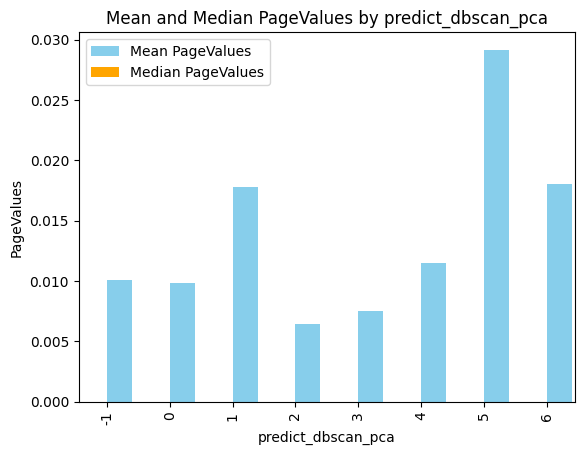

In [ ]:
grouped_data_mean = df_cluster.groupby('predict_dbscan_pca')['PageValues'].mean()
grouped_data_median = df_cluster.groupby('predict_dbscan_pca')['PageValues'].median()

# Plotting the bar chart with both mean and median
fig, ax = plt.subplots()

grouped_data_mean.plot(kind='bar', position=0, width=0.4, color='skyblue', label='Mean PageValues', ax=ax, align='center')
grouped_data_median.plot(kind='bar', position=1, width=0.4, color='orange', label='Median PageValues', ax=ax, align='edge')

ax.set_title('Mean and Median PageValues by predict_dbscan_pca')
ax.set_xlabel('predict_dbscan_pca')
ax.set_ylabel('PageValues')
ax.legend()

plt.show()

### 3.2: Classification

#### Split the dataset and select features

In [ ]:
X = df_copy_filtered.drop(["Revenue"], axis=1)

In [ ]:
y = df_copy_filtered["Revenue"]

In [ ]:
# Create a SelectKBest object
selector = SelectKBest(f_classif, k=10)

In [ ]:
# Specify the number of features to select
selector.k = 10

In [ ]:
# Fit the SelectKBest object to the data set
selector.fit(X, y)

SelectKBest()

In [ ]:
# Get the selected features
selected_features = X.columns[selector.get_support()]

In [ ]:
# Print the selected features
print(selected_features)

Index(['Administrative', 'Informational', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'Month', 'VisitorType__New_Visitor', 'VisitorType__Returning_Visitor'],
      dtype='object')


In [ ]:
# Utility function to visualize training curve
def visualize_training(clf: GridSearchCV, title: str, n_splits: int) -> None:
    """
    Visualize training process and results of a given model.
    :param clf: GridSearchCV object for hyperparameter tuning.
    :param title: A string containing the title for the visualization.
    :param n_splits: Number of folds.
    :return: None
    """
    figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
    colors = []
    for _ in range(n_splits):
        color = np.random.rand(3,)
        colors.append(color)

    for split_index in range(n_splits):
        sns.lineplot(
            x=range(len(clf.cv_results_["params"])), y=clf.cv_results_[f"split{split_index}_train_score"],
            ax=axis, label=f"Split {split_index} Train", linestyle="-", color=colors[split_index], alpha=0.15
        )
        sns.lineplot(
            x=range(len(clf.cv_results_["params"])), y=clf.cv_results_[f"split{split_index}_test_score"],
            ax=axis, label=f"Split {split_index} Test", linestyle=":", color=colors[split_index], alpha=0.15
        )

    sns.lineplot(
        x=range(len(clf.cv_results_["params"])), y=clf.cv_results_[f"mean_train_score"],
        ax=axis, label=f"Train", linestyle="-", color="red"
    )
    sns.lineplot(
        x=range(len(clf.cv_results_["params"])), y=clf.cv_results_[f"mean_test_score"],
        ax=axis, label=f"Test", linestyle="--", color="green"
    )
    axis.axvline(x=clf.best_index_, color="yellow", label="Best Score")

    axis.legend(ncol=3)
    axis.set_xlabel("Hyperparameter")
    axis.set_ylabel("Score")
    axis.set_title(title)

    figure.tight_layout()
    plt.show()

#### Model 1: Random Forest Classification with Hyperparameter Tuning, Stratification and Oversampling

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.25, random_state=426, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(8444, 10)

(2815, 10)

(8444,)

(2815,)

In [ ]:
# use SMOTE to balance classes
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
# Before oversampling
unique, counts = np.unique(y_train, return_counts = True)
print(np.asarray((unique, counts)).T)

# After oversampling
unique, counts = np.unique(y_train_res, return_counts = True)
print(np.asarray((unique, counts)).T)

[[   0 7162]
 [   1 1282]]
[[   0 7162]
 [   1 7162]]


In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier()

In [ ]:
# parameters range to tune the model
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# split the dataset into 10 fold with the proportion of observations with a given label stay the same
skf = StratifiedKFold(n_splits = 10)

In [ ]:
rf_hyper = GridSearchCV(rf, param_grid = hyperparameters, n_jobs = -1, cv = skf, return_train_score=True)

In [ ]:
# Fit the GridSearchCV object to the training data
rf_hyper.fit(X_train_res, y_train_res)

# Print the best hyperparameters
print(rf_hyper.best_params_)

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


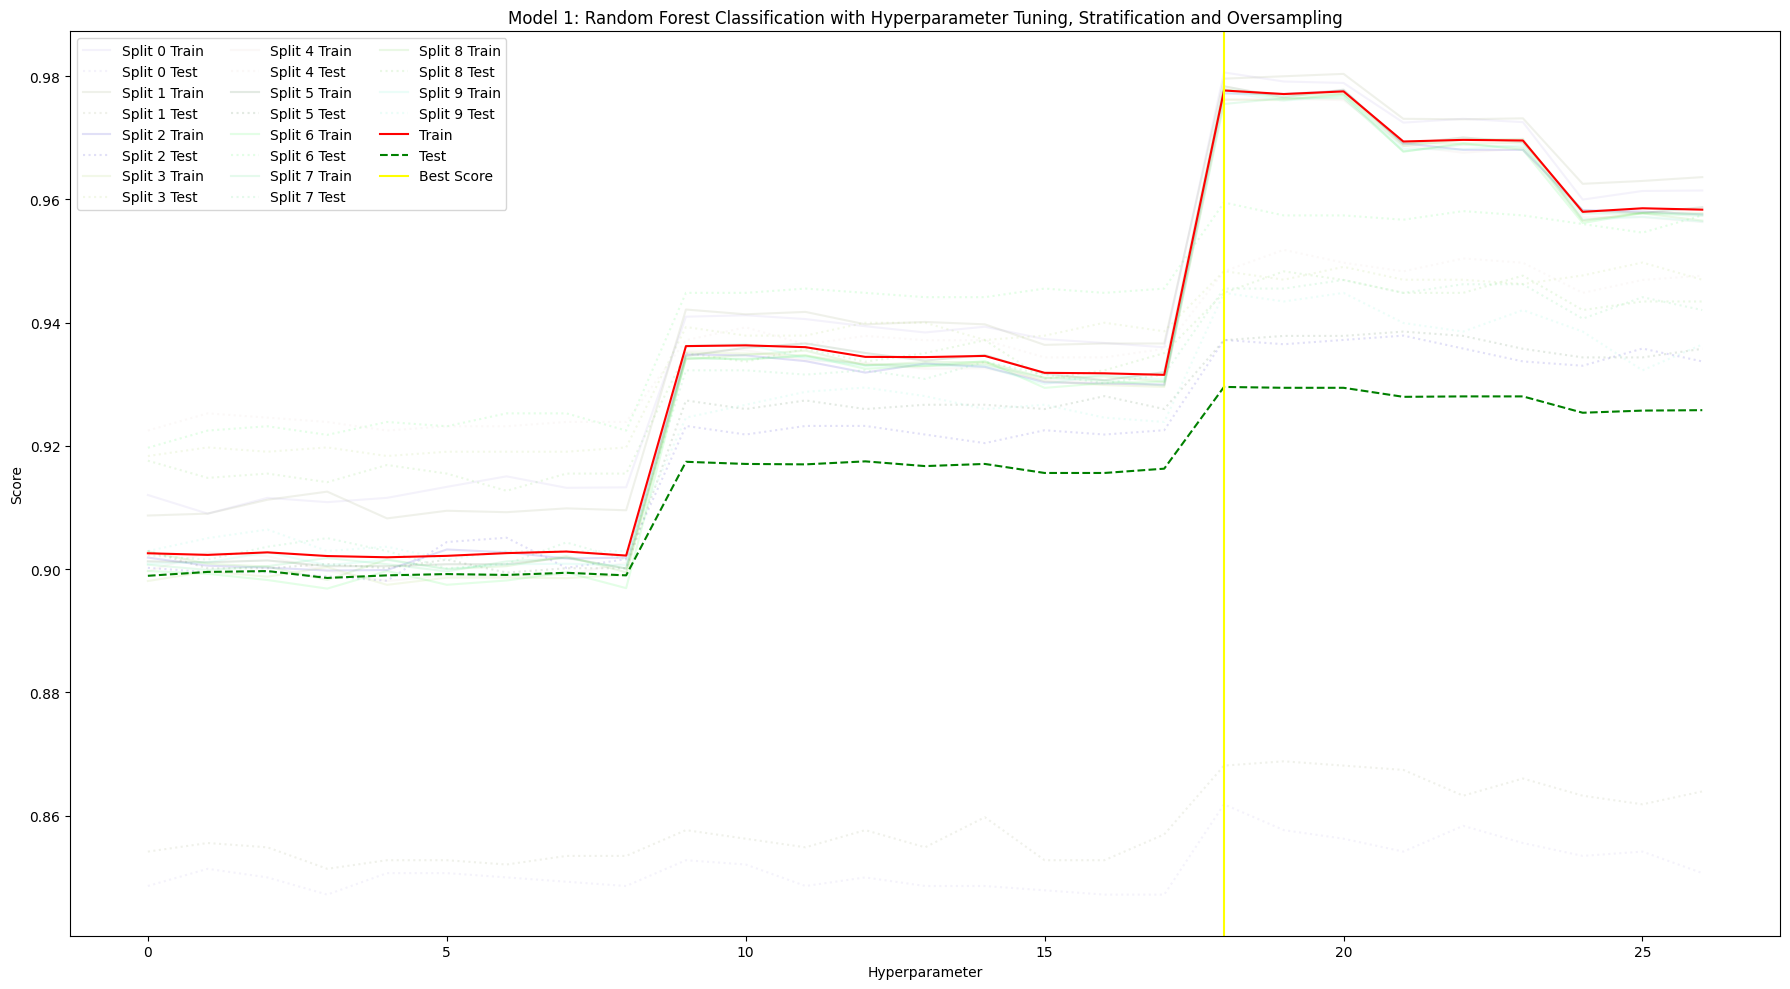

In [ ]:
visualize_training(
    clf=rf_hyper,
    title='Model 1: Random Forest Classification with Hyperparameter Tuning, Stratification and Oversampling',
    n_splits=10
)

In [ ]:
print('Model accuracy for train set: {0:.3f}'.format(rf_hyper.score(X_train_res, y_train_res)))
print('Model accuracy for test set: {0:.3f}'.format(rf_hyper.score(X_test, y_test)))

Model accuracy for train set: 0.976
Model accuracy for test set: 0.898


In [ ]:
y_pred_rf_hyper = rf_hyper.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_rf_hyper))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2387
           1       0.64      0.76      0.70       428

    accuracy                           0.90      2815
   macro avg       0.80      0.84      0.82      2815
weighted avg       0.91      0.90      0.90      2815



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_hyper)
print('\nConfusion Matrix:\n', cm)


Confusion Matrix:
 [[2201  186]
 [ 101  327]]


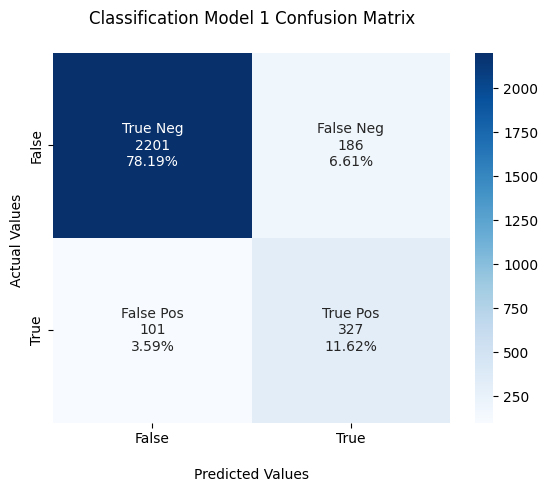

In [ ]:
group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Classification Model 1 Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Accuracy Score
auc = accuracy_score(y_test, y_pred_rf_hyper)
print('\nAccuracy Score: ', auc.round(3))


Accuracy Score:  0.898


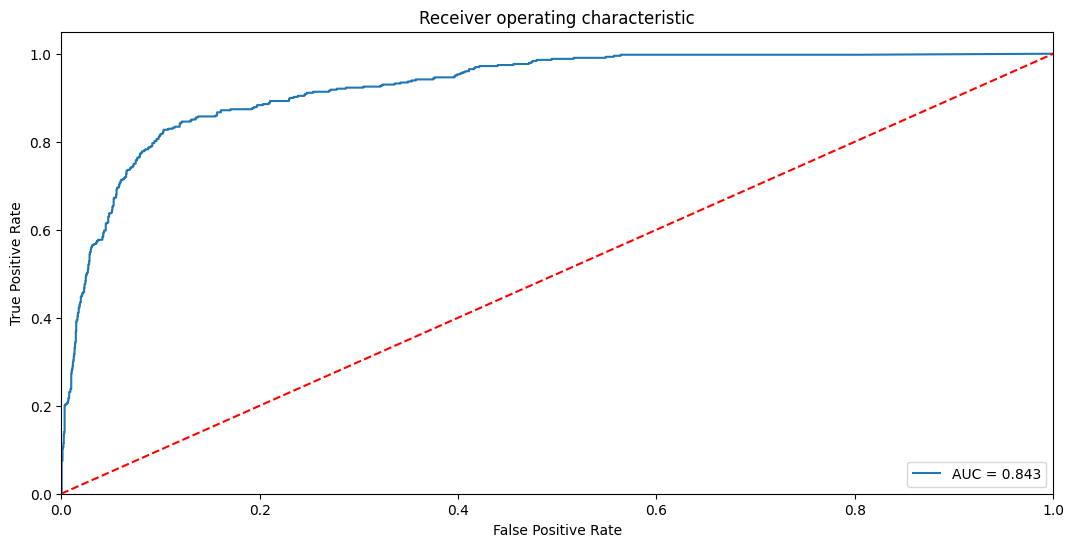

In [ ]:
# ROC Curve
model_roc_auc = roc_auc_score(y_test, y_pred_rf_hyper)
fpr, tpr, thresholds = roc_curve(y_test, rf_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'AUC = {}'.format(model_roc_auc.round(4)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### Model 2: Decision Tree Classification with Hyperparameter Tunning, Stratification and Oversampling

In [ ]:
# create decision tree instance
dt = DecisionTreeClassifier()

In [ ]:
# creating hyperparameters range
hyperparameters = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

In [ ]:
dt_hyper = GridSearchCV(dt, param_grid = hyperparameters, n_jobs = -1, cv = skf, return_train_score=True)

In [ ]:
# Fit the GridSearchCV object to the training data
dt_hyper.fit(X_train_res, y_train_res)

# Print the best hyperparameters
print(dt_hyper.best_params_)

{'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 5}


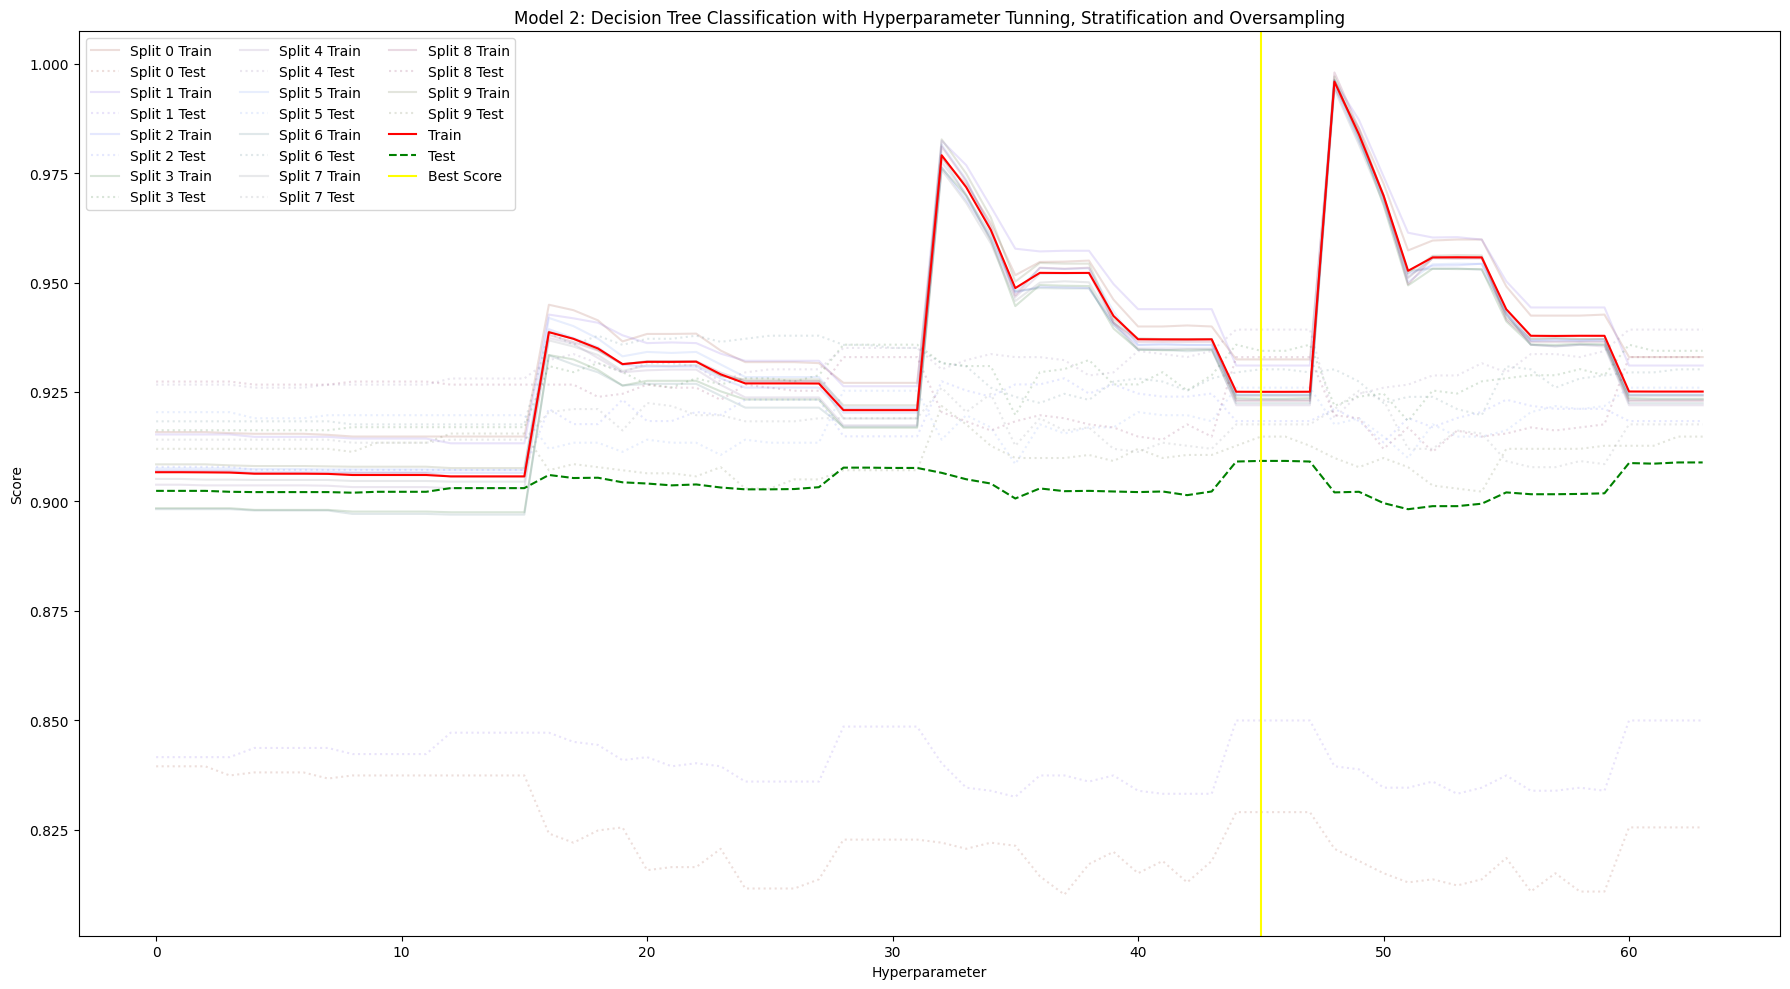

In [ ]:
visualize_training(
    clf=dt_hyper,
    title='Model 2: Decision Tree Classification with Hyperparameter Tunning, Stratification and Oversampling',
    n_splits=10
)

In [ ]:
# print out accuracies
print('Model accuracy for train set: {0:.3f}'.format(dt_hyper.score(X_train_res, y_train_res)))
print('Model accuracy for test set: {0:.3f}'.format(dt_hyper.score(X_test, y_test)))

Model accuracy for train set: 0.924
Model accuracy for test set: 0.882


In [ ]:
y_pred_dt_hyper = dt_hyper.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_dt_hyper))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2387
           1       0.59      0.77      0.66       428

    accuracy                           0.88      2815
   macro avg       0.77      0.84      0.80      2815
weighted avg       0.90      0.88      0.89      2815



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt_hyper)
print('\nConfusion Matrix:\n', cm)


Confusion Matrix:
 [[2154  233]
 [  99  329]]


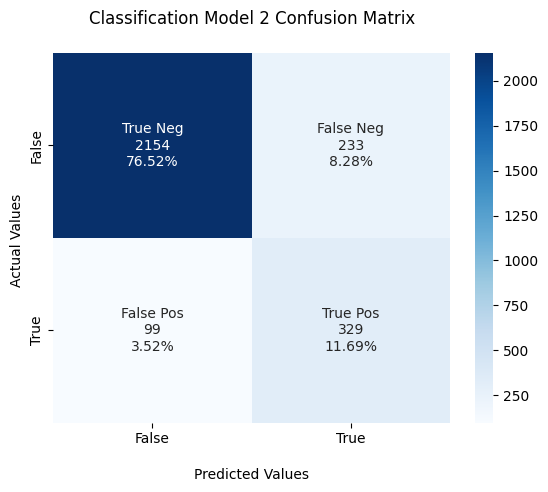

In [ ]:
group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Classification Model 2 Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Accuracy Score
auc = accuracy_score(y_test, y_pred_dt_hyper)
print('\nAccuracy Score: ', auc.round(3))


Accuracy Score:  0.882


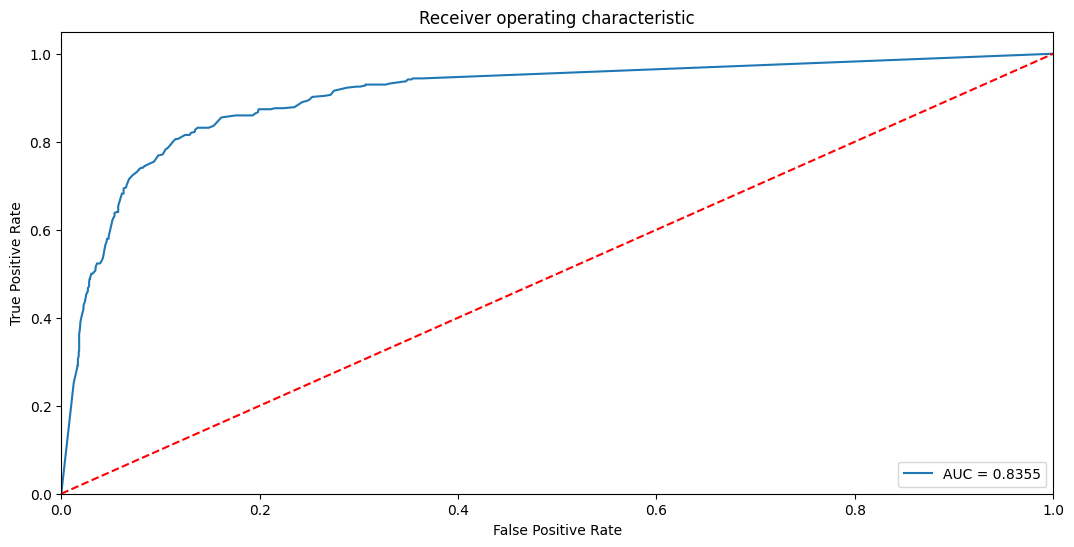

In [ ]:
# ROC Curve
model_roc_auc = roc_auc_score(y_test, y_pred_dt_hyper)
fpr, tpr, thresholds = roc_curve(y_test, dt_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'AUC = {}'.format(model_roc_auc.round(4)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### Model 3: Extra Trees Classifier with Hyperparameter Tunning, Stratification, Oversampling and Robust Scaling

In [ ]:
# creating model instance
et = ExtraTreesClassifier()

In [ ]:
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [ ]:
et_hyper = GridSearchCV(et, param_grid = hyperparameters, n_jobs = -1, cv = skf, return_train_score=True)

In [ ]:
# Fit the GridSearchCV object to the training data
et_hyper.fit(X_train_res, y_train_res)

# Print the best hyperparameters
print(et_hyper.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


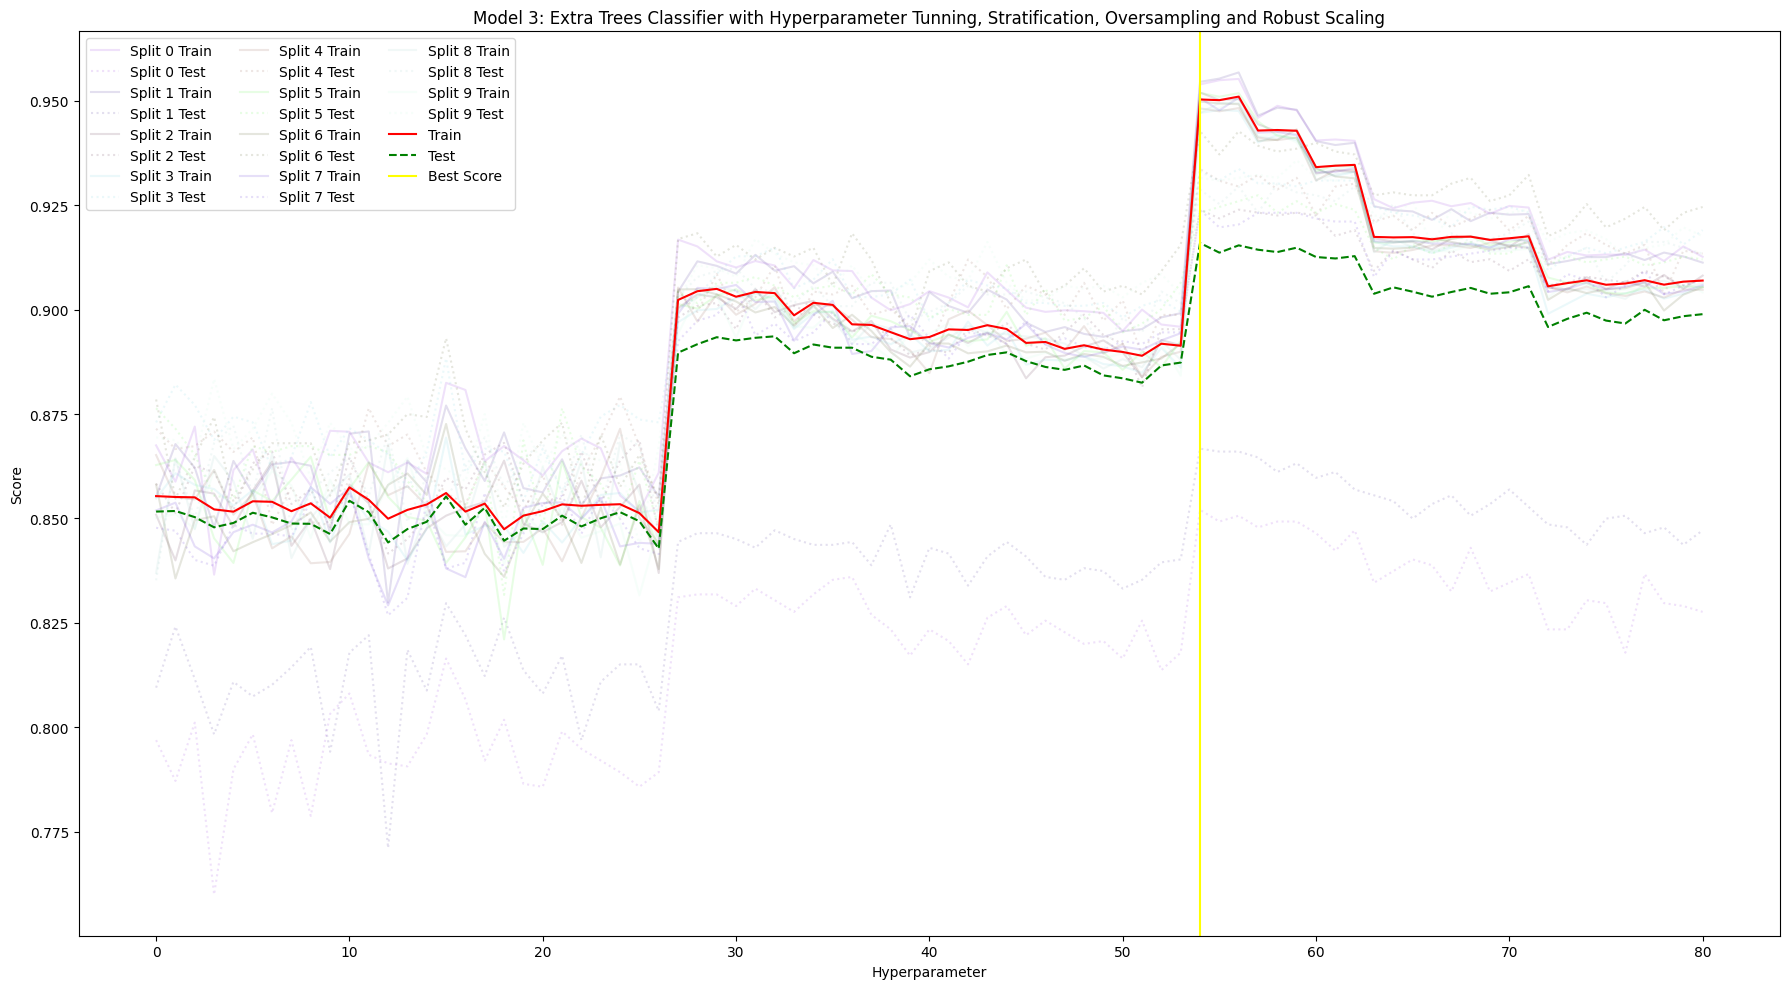

In [ ]:
visualize_training(
    clf=et_hyper,
    title='Model 3: Extra Trees Classifier with Hyperparameter Tunning, Stratification, Oversampling and Robust Scaling',
    n_splits=10
)

In [ ]:
print('Model accuracy for train set: {0:.3f}'.format(et_hyper.score(X_train_res, y_train_res)))
print('Model accuracy for test set: {0:.3f}'.format(et_hyper.score(X_test, y_test)))

Model accuracy for train set: 0.950
Model accuracy for test set: 0.885


In [ ]:
y_pred_et_hyper = et_hyper.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_et_hyper))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2387
           1       0.60      0.76      0.67       428

    accuracy                           0.89      2815
   macro avg       0.78      0.83      0.80      2815
weighted avg       0.90      0.89      0.89      2815



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_et_hyper)
print('\nConfusion Matrix:\n', cm)


Confusion Matrix:
 [[2167  220]
 [ 103  325]]


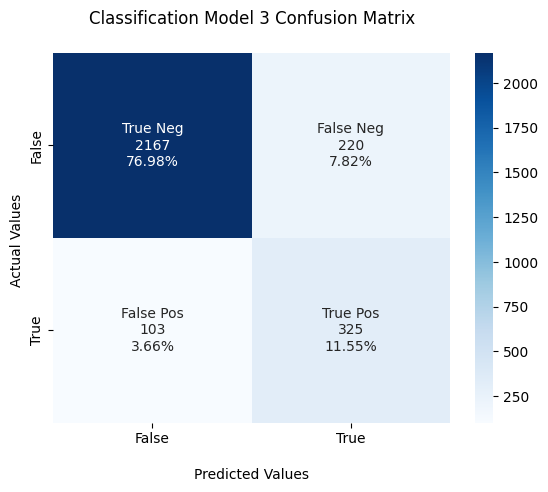

In [ ]:
group_names = ['True Neg','False Neg','False Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Classification Model 3 Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Accuracy Score
auc = accuracy_score(y_test, y_pred_et_hyper)
print('\nAccuracy Score: ', auc.round(3))


Accuracy Score:  0.885


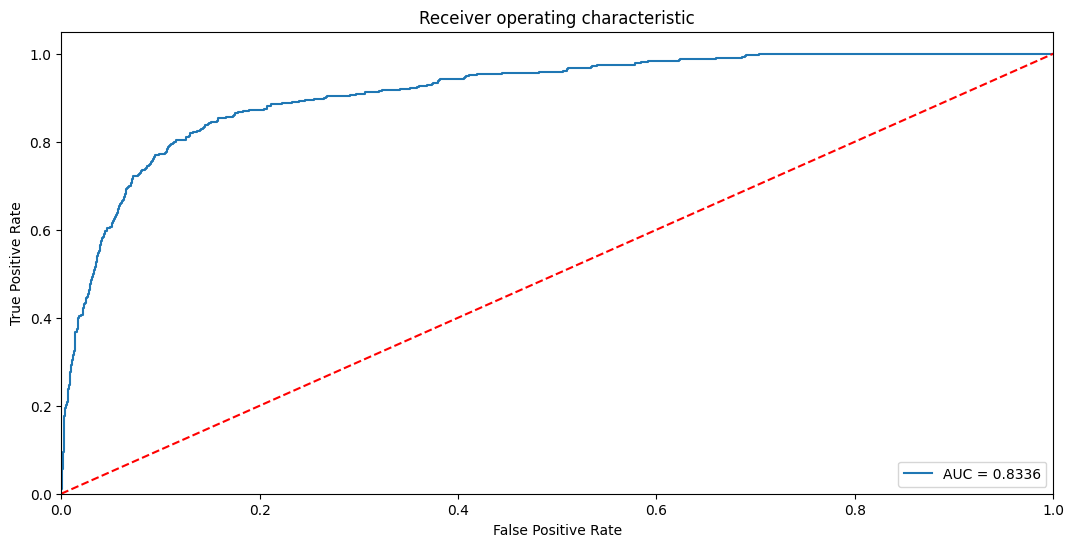

In [ ]:
# ROC Curve
model_roc_auc = roc_auc_score(y_test, y_pred_et_hyper)
fpr, tpr, thresholds = roc_curve(y_test, et_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'AUC = {}'.format(model_roc_auc.round(4)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### Model Comparison

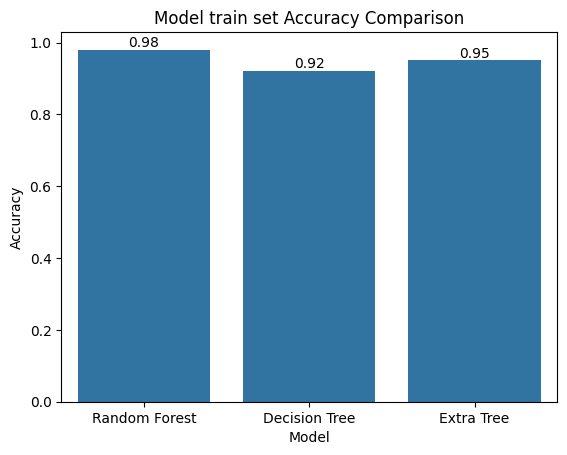

In [ ]:
# plotting bargraph to compare accuracy
models = ['Random Forest', 'Decision Tree', 'Extra Tree']
accuracies = [(rf_hyper.score(X_train_res, y_train_res)).round(2), (dt_hyper.score(X_train_res, y_train_res)).round(2), (et_hyper.score(X_train_res, y_train_res)).round(2)]

sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model train set Accuracy Comparison')
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, accuracy, ha='center', va='bottom')
plt.show()

Accuracy of test set:

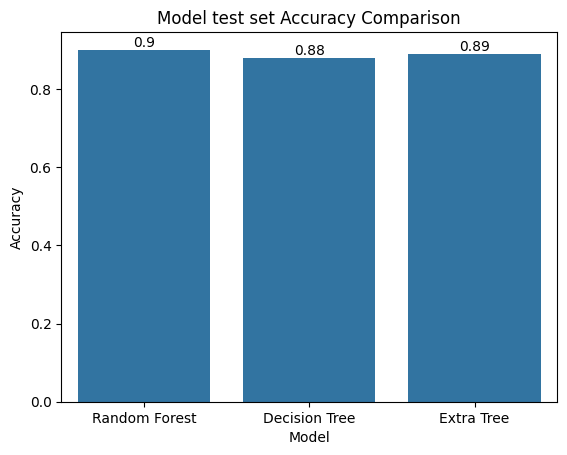

In [ ]:
# plotting bargraph to compare accuracy
models = ['Random Forest', 'Decision Tree', 'Extra Tree']
accuracies = [(accuracy_score(y_test, y_pred_rf_hyper)).round(2), (accuracy_score(y_test, y_pred_dt_hyper)).round(2), (accuracy_score(y_test, y_pred_et_hyper)).round(2)]

sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model test set Accuracy Comparison')
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, accuracy, ha='center', va='bottom')
plt.show()

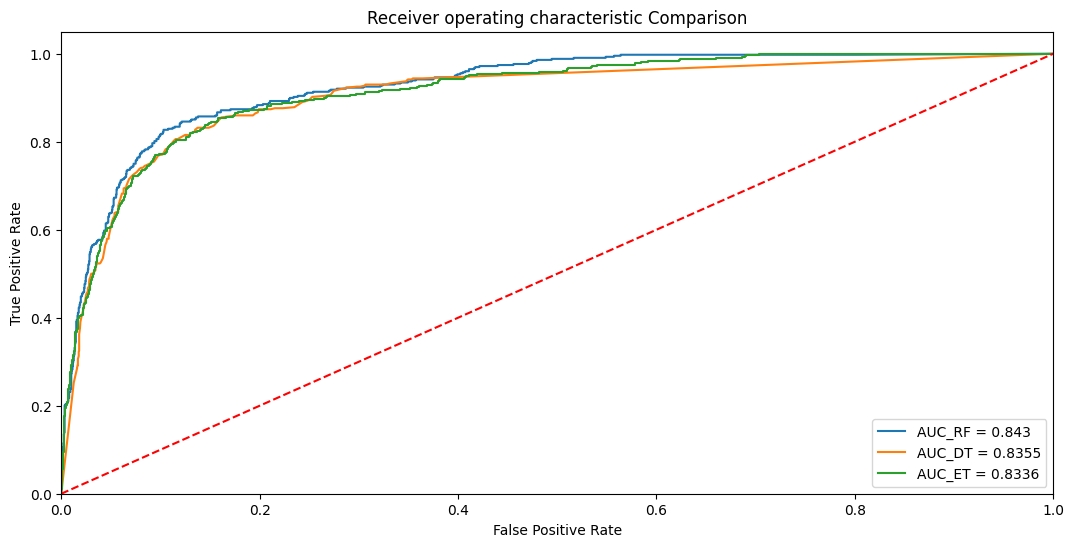

In [ ]:
# ROC Curve Comparison
et_roc_auc = roc_auc_score(y_test, y_pred_et_hyper)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_hyper)
dt_roc_auc = roc_auc_score(y_test, y_pred_dt_hyper)

fpr_et, tpr_et, thresholds_et = roc_curve(y_test, et_hyper.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_hyper.predict_proba(X_test)[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_hyper.predict_proba(X_test)[:,1])

plt.figure(figsize = (12.8 , 6))

plt.plot(fpr_rf, tpr_rf, label = 'AUC_RF = {}'.format(rf_roc_auc.round(4)))
plt.plot(fpr_dt, tpr_dt, label = 'AUC_DT = {}'.format(dt_roc_auc.round(4)))
plt.plot(fpr_et, tpr_et, label = 'AUC_ET = {}'.format(et_roc_auc.round(4)))

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Comparison')
plt.legend(loc = 'lower right')
plt.show()

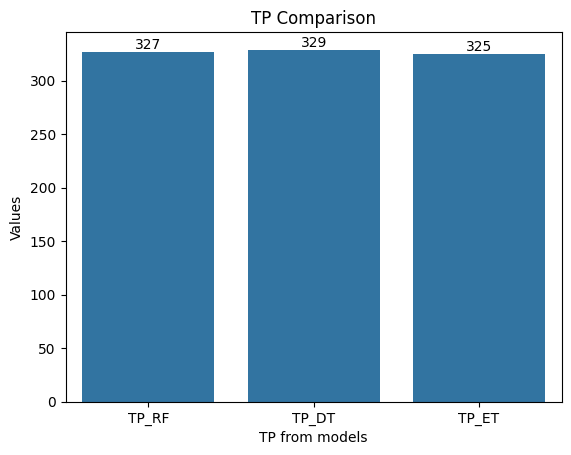

In [ ]:
# plot TP comparison
cm_RF = confusion_matrix(y_test, y_pred_rf_hyper)
cm_DT = confusion_matrix(y_test, y_pred_dt_hyper)
cm_ET = confusion_matrix(y_test, y_pred_et_hyper)

TP = ['TP_RF', 'TP_DT', 'TP_ET']
TP_values = [cm_RF[1,1], cm_DT[1,1], cm_ET[1,1]]

sns.barplot(x=TP, y=TP_values)
plt.xlabel('TP from models')
plt.ylabel('Values')
plt.title('TP Comparison')
for i, TP_values in enumerate(TP_values):
    plt.text(i, TP_values, TP_values, ha='center', va='bottom')
plt.show()

**Overal comparison metrics:**

|Name|Calculation method|
|:----|:----|
|Accuracy (acc)|$$\frac{TP+TN}{TP+FP+TN+FN}$$|
|Precision (p)|$$\frac{TP}{FP+TN}$$|
|Recall (r)|$$\frac{TP}{TP+TN}$$|
|F1 Score (F1)|$$\frac{2\times p\times r}{p+r}$$|
|Matthews correlation coefficient (MMC)|$$\frac{TP\times T N-FP\times F N}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$|

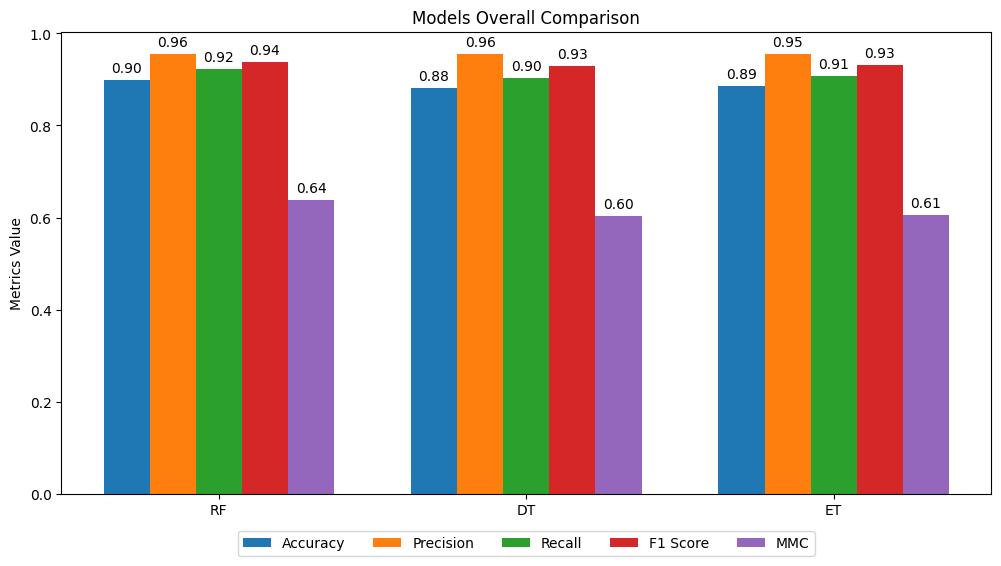

In [ ]:
# Plot overal comparison between accuracy, precision, recall, F1, and MMC

def calculate_metrics(confusion_matrix, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred, pos_label=0)
    r = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)
    mmc = matthews_corrcoef(y_test, y_pred)
    return acc, p, r, f1, mmc


cm_rf = np.array(confusion_matrix(y_test, y_pred_rf_hyper))
cm_dt = np.array(confusion_matrix(y_test, y_pred_dt_hyper))
cm_et = np.array(confusion_matrix(y_test, y_pred_et_hyper))
metrics_rf = calculate_metrics(cm_rf, y_test, y_pred_rf_hyper)
metrics_dt = calculate_metrics(cm_dt, y_test, y_pred_dt_hyper)
metrics_et = calculate_metrics(cm_et, y_test, y_pred_et_hyper)

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MMC']
models = ['RF', 'DT', 'ET']
metrics_values = np.array([metrics_rf, metrics_dt, metrics_et])

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
bar_positions = np.arange(len(models))

for i, metric_name in enumerate(metrics_names):
    ax.bar(bar_positions + i * bar_width,
           metrics_values[:, i], width=bar_width, label=metric_name)

for i, model in enumerate(models):
    for j, metric_value in enumerate(metrics_values[i]):
        ax.text(i + j * bar_width, metric_value + 0.01,
                f'{metric_value:.2f}', ha='center', va='bottom')

ax.set_xticks(bar_positions + (len(metrics_names) - 1) * bar_width / 2)
ax.set_xticklabels(models)
ax.set_ylabel('Metrics Value')
ax.set_title('Models Overall Comparison')
ax.legend(loc='lower center', bbox_to_anchor=(
    0.5, -0.15), ncol=len(metrics_names))

plt.show()